# Analysis Of Food Consumption Patterns and Nutritional Intake

## Kalyan Pothineni

In [74]:
# Load the libraries as needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Food data dataset

In [75]:
# Load the datasets
food_data = pd.read_csv('FOOD-DATA-GROUP1.csv')

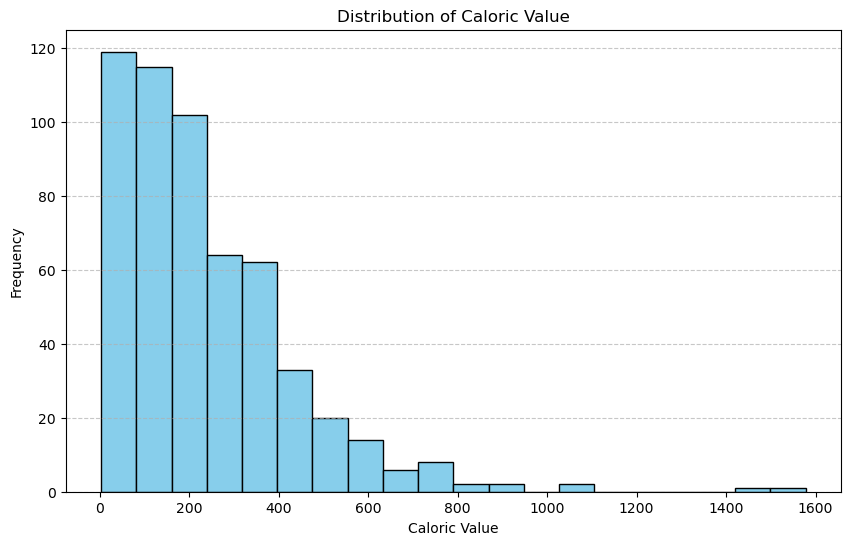

In [76]:
# Create a histogram for the 'Caloric Value' column
plt.figure(figsize=(10, 6))
plt.hist(food_data['Caloric Value'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Caloric Value')
plt.xlabel('Caloric Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


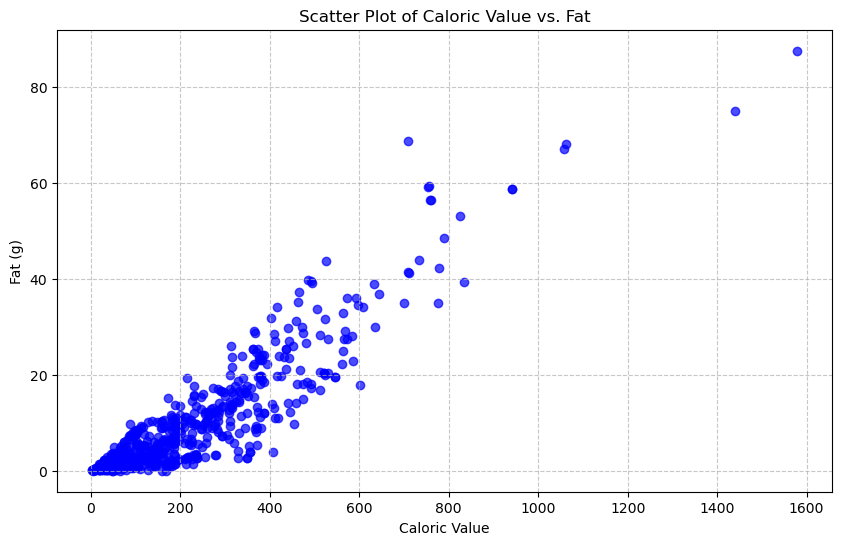

In [77]:
# Create a scatter plot for 'Caloric Value' vs 'Fat'
plt.figure(figsize=(10, 6))
plt.scatter(food_data['Caloric Value'], food_data['Fat'], alpha=0.7, color='blue')
plt.title('Scatter Plot of Caloric Value vs. Fat')
plt.xlabel('Caloric Value')
plt.ylabel('Fat (g)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [78]:
# Calculate the correlation between 'Caloric Value' and 'Fat'
correlation = food_data['Caloric Value'].corr(food_data['Fat'])
correlation


0.9090236029444225

## Group 2 load

In [79]:
# Load the dataset
group2 = pd.read_csv('FOOD-DATA-GROUP2.csv')

# Convert all column headers to uppercase
group2.columns = [col.upper() for col in group2.columns]

# Display the first few rows of the dataset to verify changes
group2.head()

,ID,ID2,FOOD,CALORIC VALUE,FAT,SATURATED FATS,MONOUNSATURATED FATS,POLYUNSATURATED FATS,CARBOHYDRATES,SUGARS,...,CALCIUM,COPPER,IRON,MAGNESIUM,MANGANESE,PHOSPHORUS,POTASSIUM,SELENIUM,ZINC,NUTRITION DENSITY
0,0,0,eggnog,224,10.6,6.6,3.3,0.5,20.4,20.4,...,330.2,0.051,0.500,48.3,0.024,276.9,419.1,0.094,1.200,377.200
1,1,1,beer light,96,0.0,0.0,0.0,0.0,5.4,0.3,...,13.2,0.095,0.014,16.5,0.094,39.6,69.3,0.077,0.044,19.456
2,2,2,beer budweiser,12,0.0,0.0,0.0,0.0,0.9,0.0,...,1.2,0.095,0.000,2.1,0.038,3.8,9.7,0.000,0.000,2.200
3,3,3,weizenbier erdinger,220,18.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,18.000
4,4,4,beer light budweiser,9,0.0,0.0,0.0,0.0,0.4,0.0,...,0.9,0.088,0.000,2.1,0.007,3.2,7.7,0.000,0.000,1.320


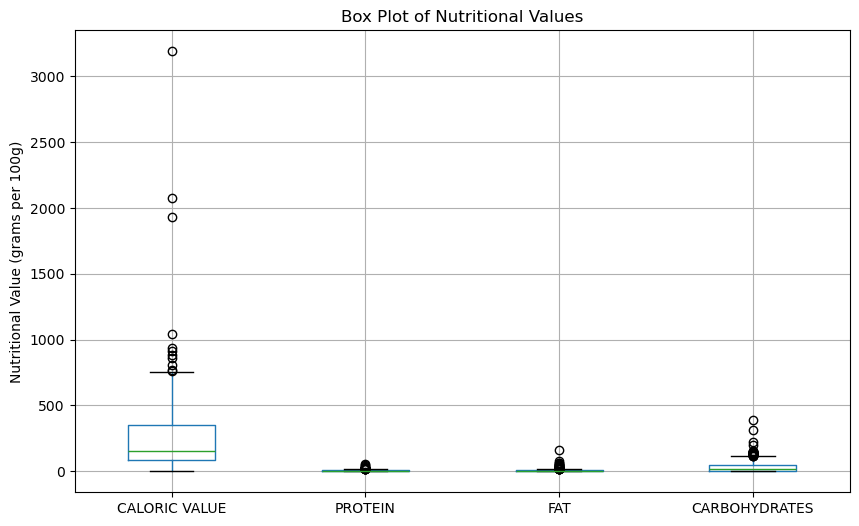

In [80]:
# Plot the box plot
plt.figure(figsize=(10, 6))
group2.boxplot(column=['CALORIC VALUE', 'PROTEIN', 'FAT', 'CARBOHYDRATES'])
plt.title('Box Plot of Nutritional Values')
plt.ylabel('Nutritional Value (grams per 100g)')
plt.savefig('nutritional_values_boxplot.png')
plt.show()

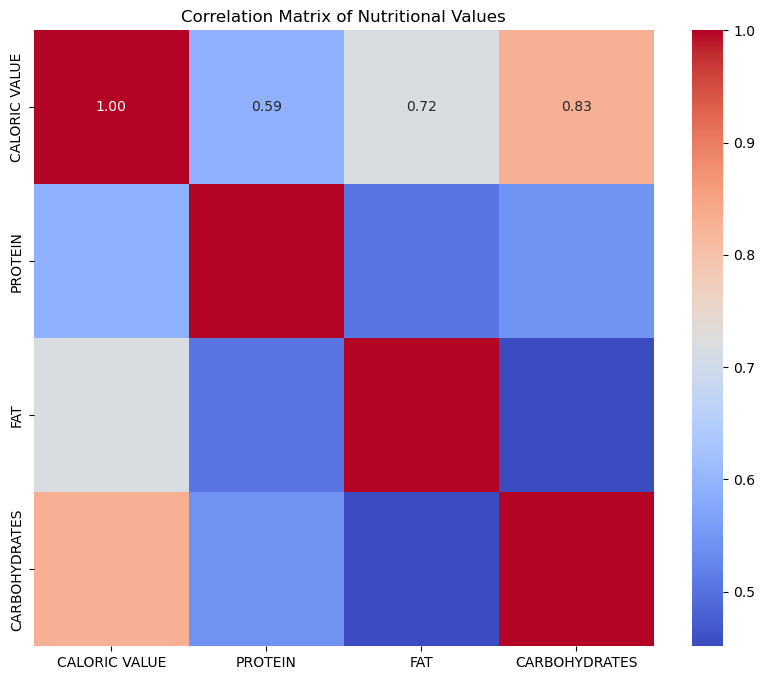

In [81]:
# Select relevant nutritional columns for correlation matrix
nutritional_columns = ['CALORIC VALUE', 'PROTEIN', 'FAT', 'CARBOHYDRATES']

# Calculate correlation matrix
corr = group2[nutritional_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Values')
plt.savefig('nutritional_values_correlation_matrix.png')
plt.show()

### Merge the data sets

In [82]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Load the datasets
file_paths = [
    "FOOD-DATA-GROUP1.csv",
    "FOOD-DATA-GROUP2.csv",
    "FOOD-DATA-GROUP3.csv",
    "FOOD-DATA-GROUP4.csv",
    "FOOD-DATA-GROUP5.csv"
]

# Read and transform the datasets
dataframes = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df.columns = [col.upper() for col in df.columns]
    df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)
    dataframes.append(df)

# Merge the datasets
merged_df = pd.concat(dataframes, ignore_index=True)

merged_df.head()


,ID,ID2,FOOD,CALORIC VALUE,FAT,SATURATED FATS,MONOUNSATURATED FATS,POLYUNSATURATED FATS,CARBOHYDRATES,SUGARS,...,CALCIUM,COPPER,IRON,MAGNESIUM,MANGANESE,PHOSPHORUS,POTASSIUM,SELENIUM,ZINC,NUTRITION DENSITY
0,0,0,CREAM CHEESE,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,NEUFCHATEL CHEESE,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,REQUEIJAO CREMOSO LIGHT CATUPIRY,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,RICOTTA CHEESE,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,CREAM CHEESE LOW FAT,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


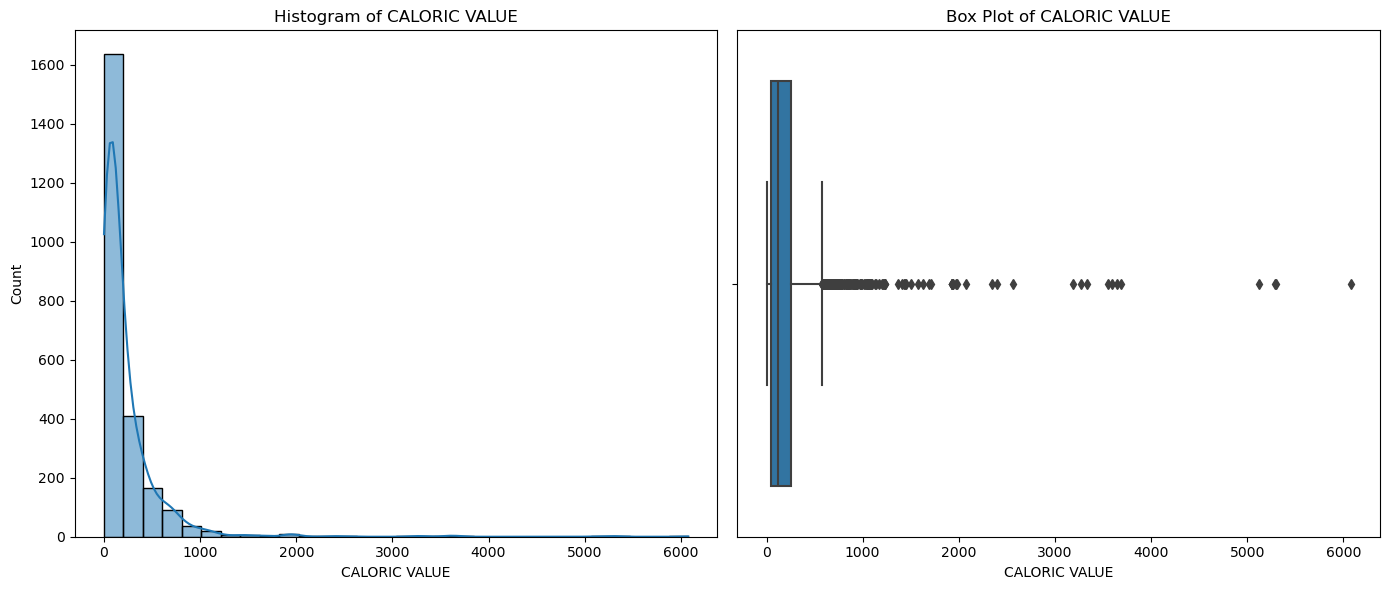

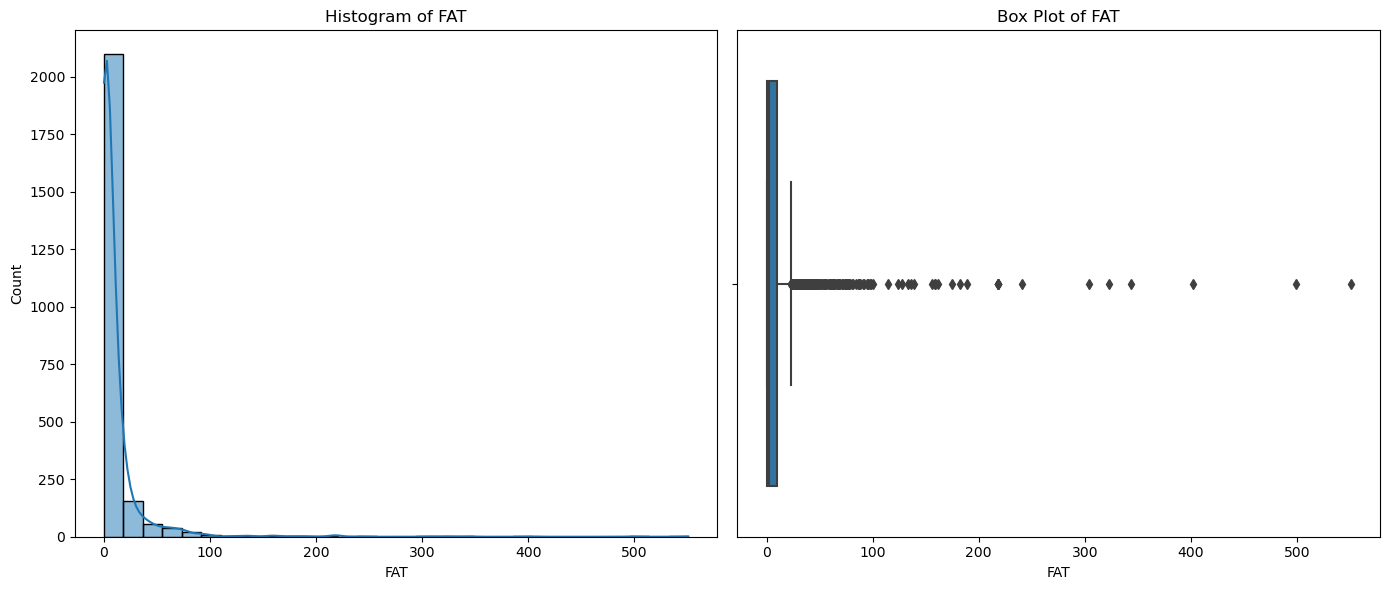

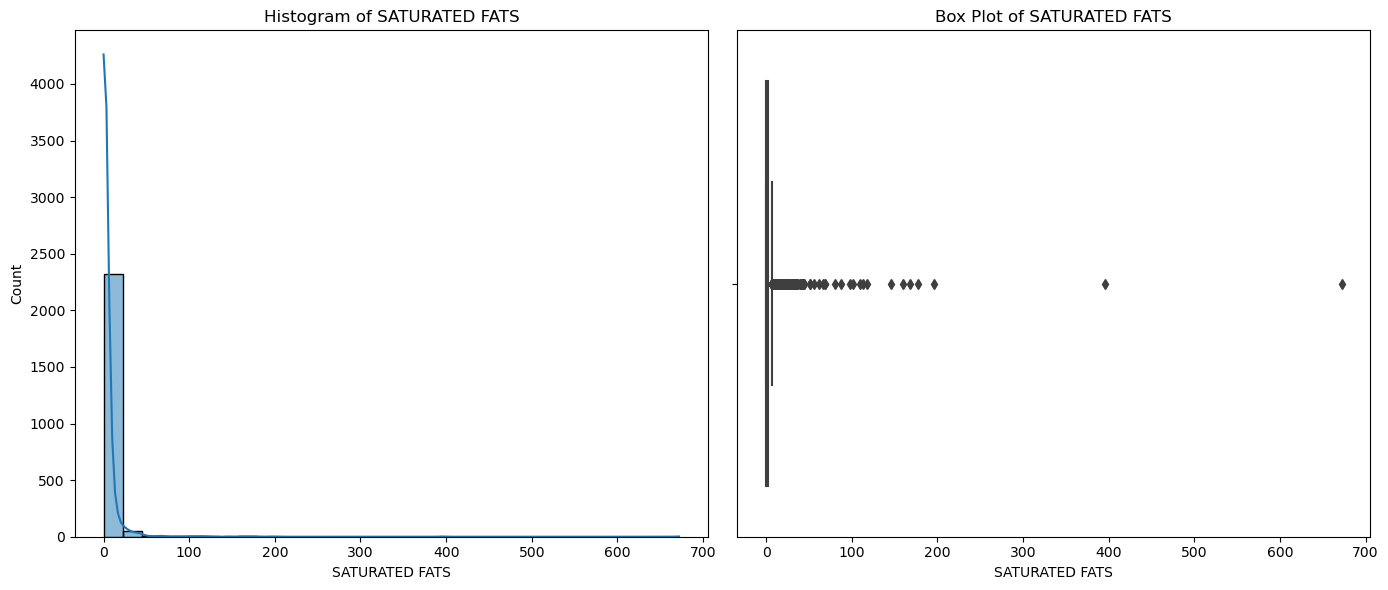

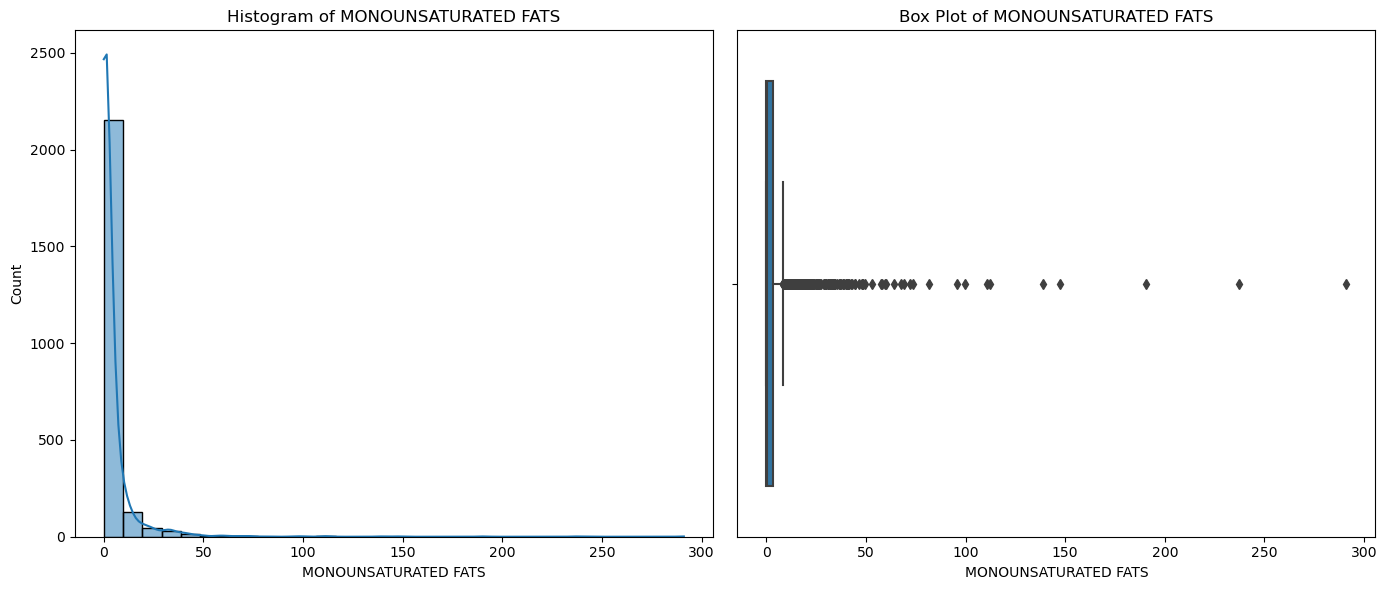

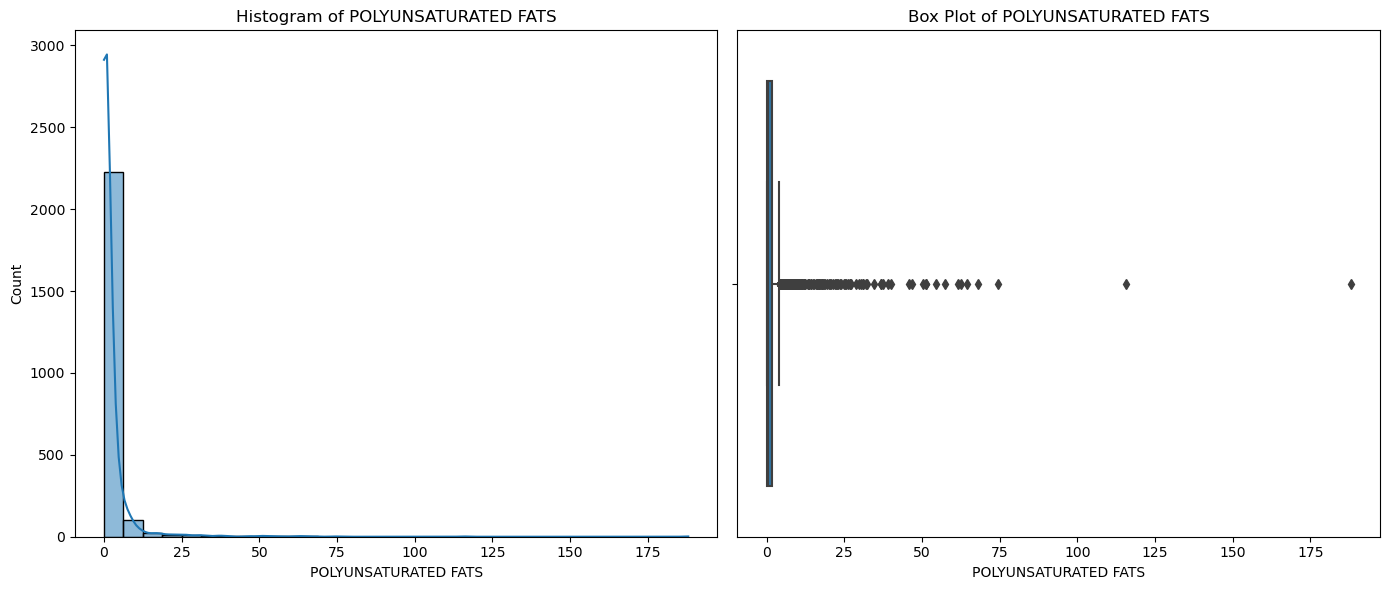

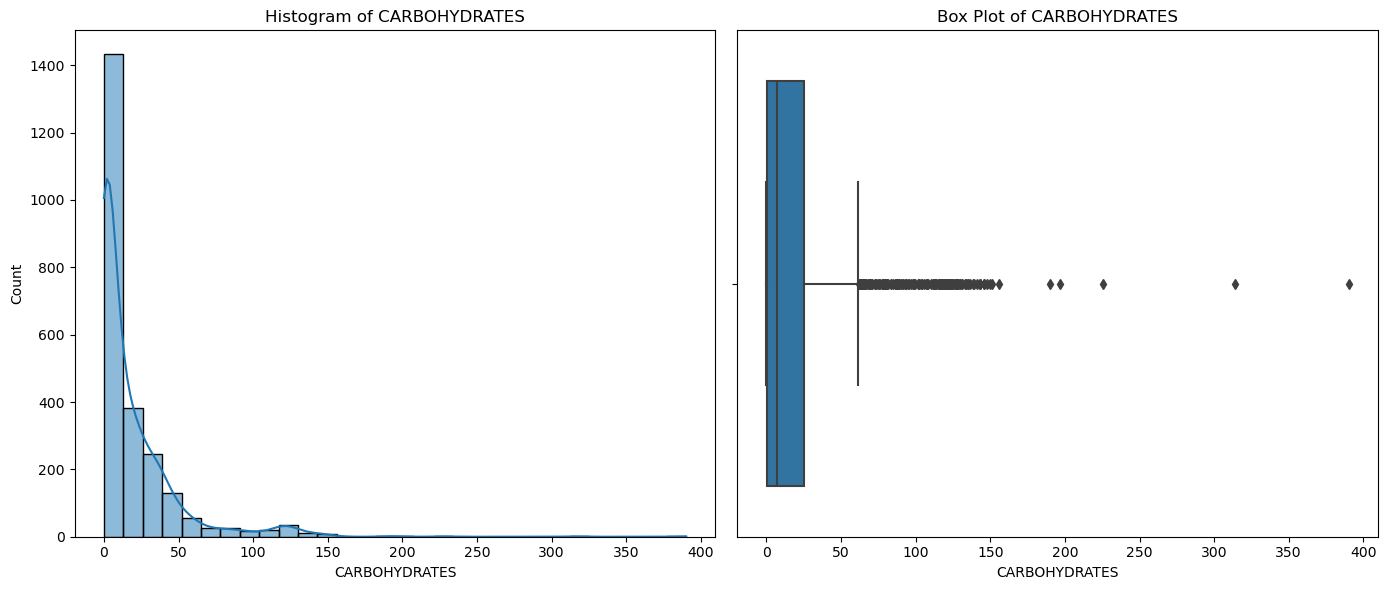

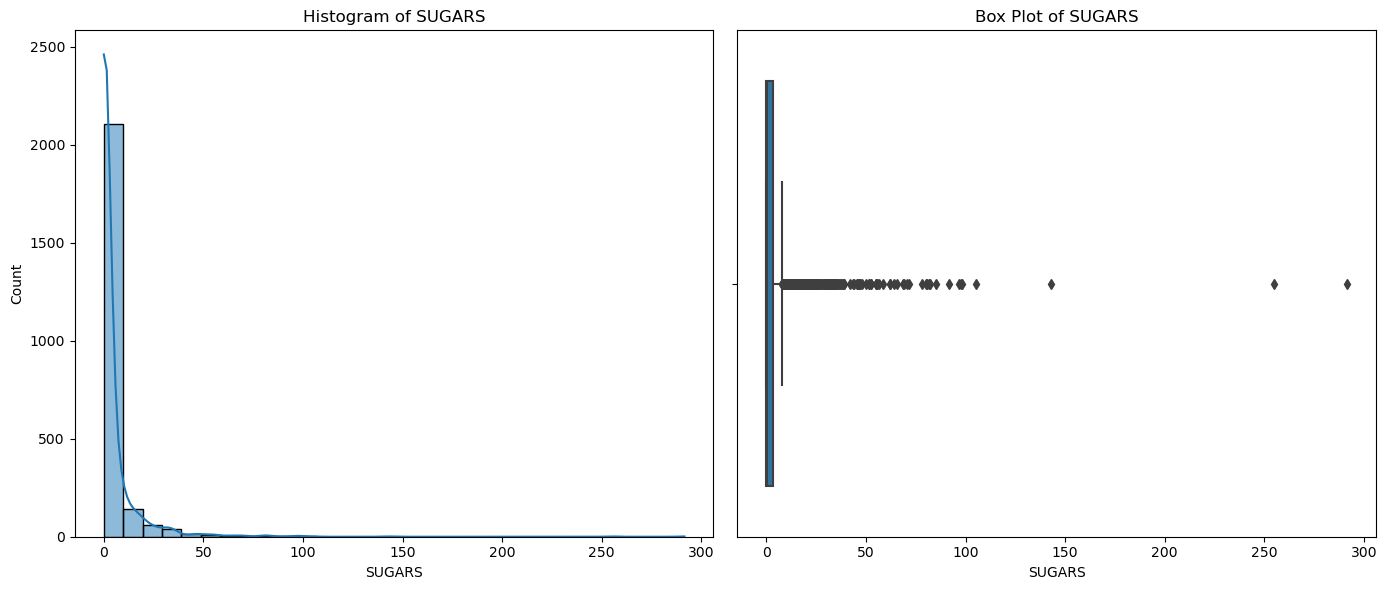

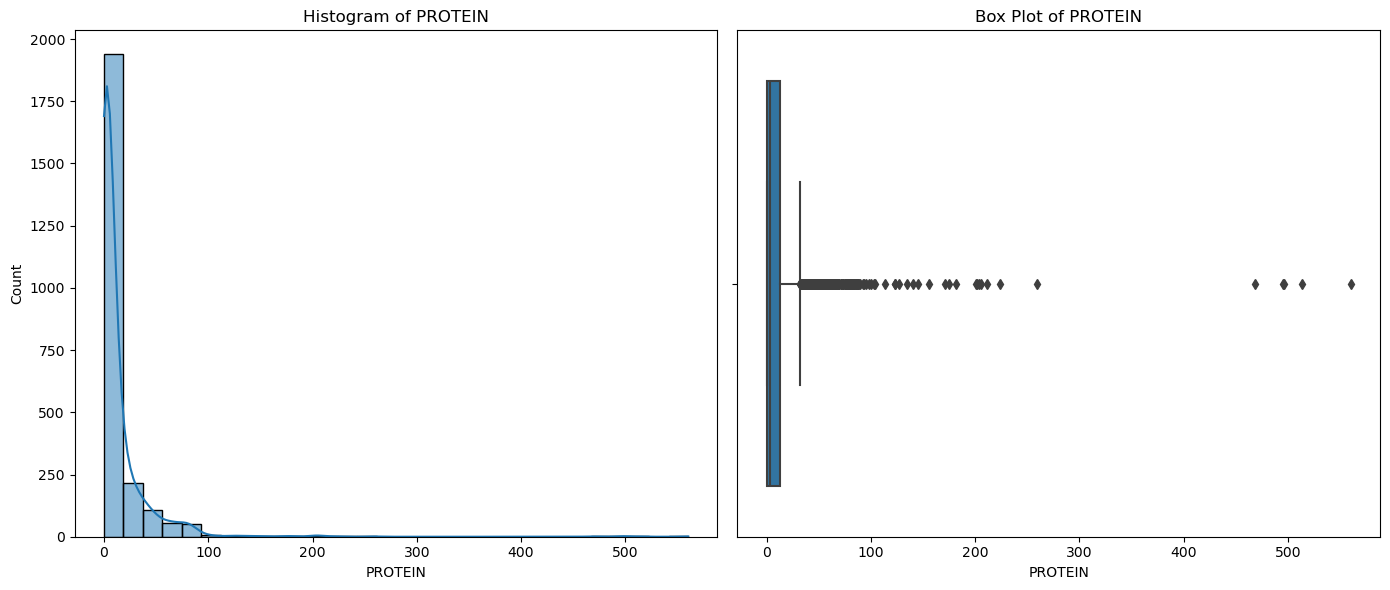

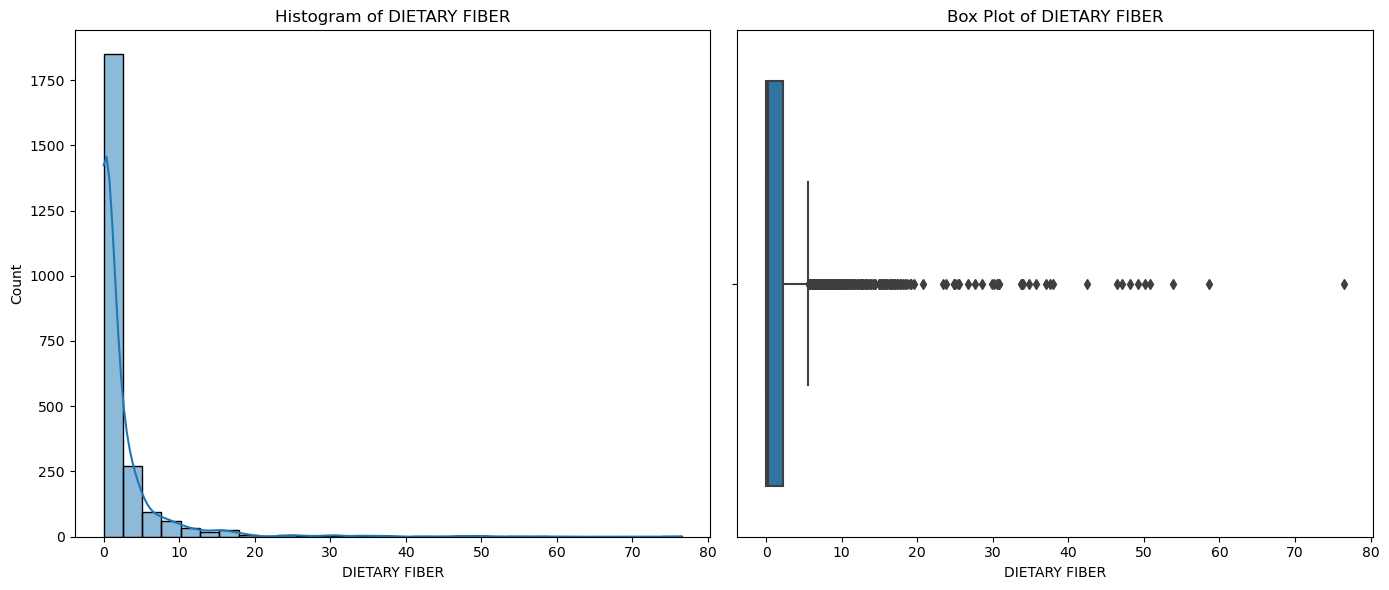

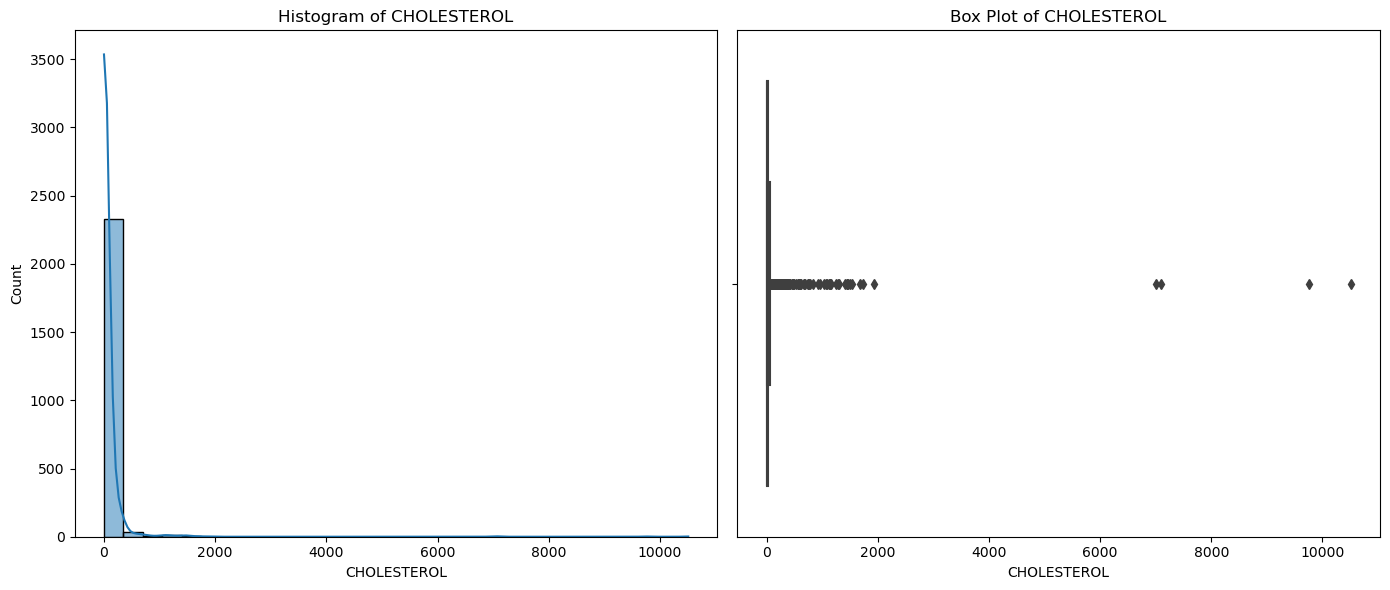

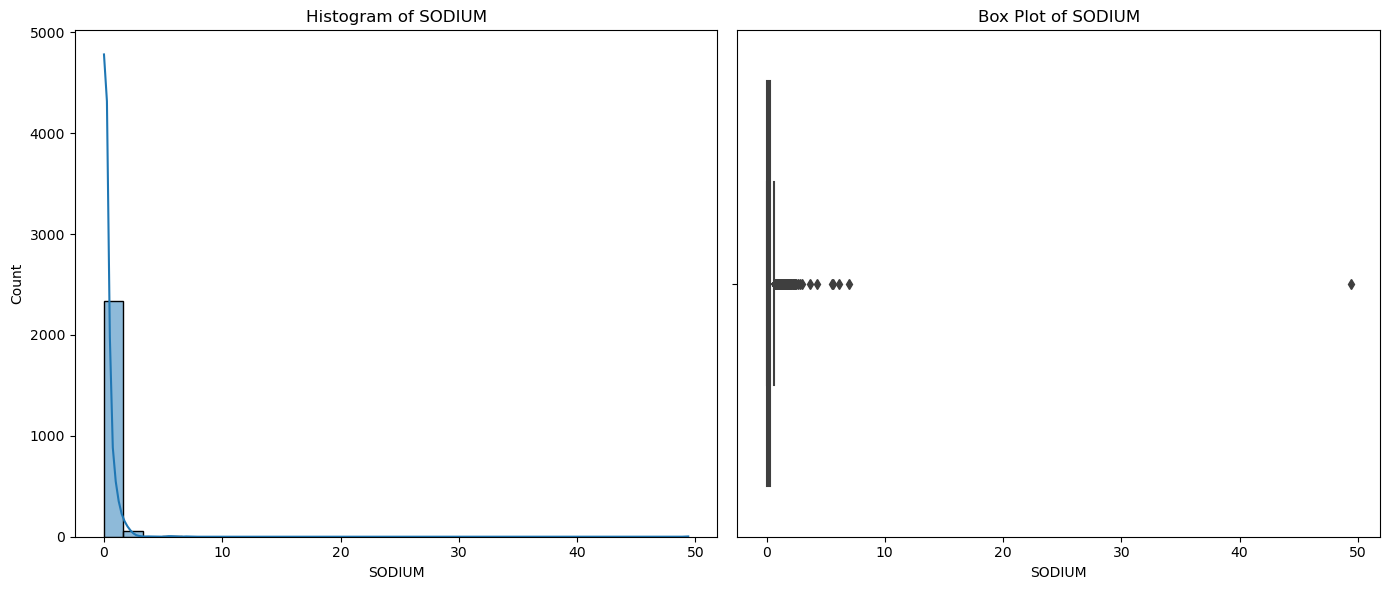

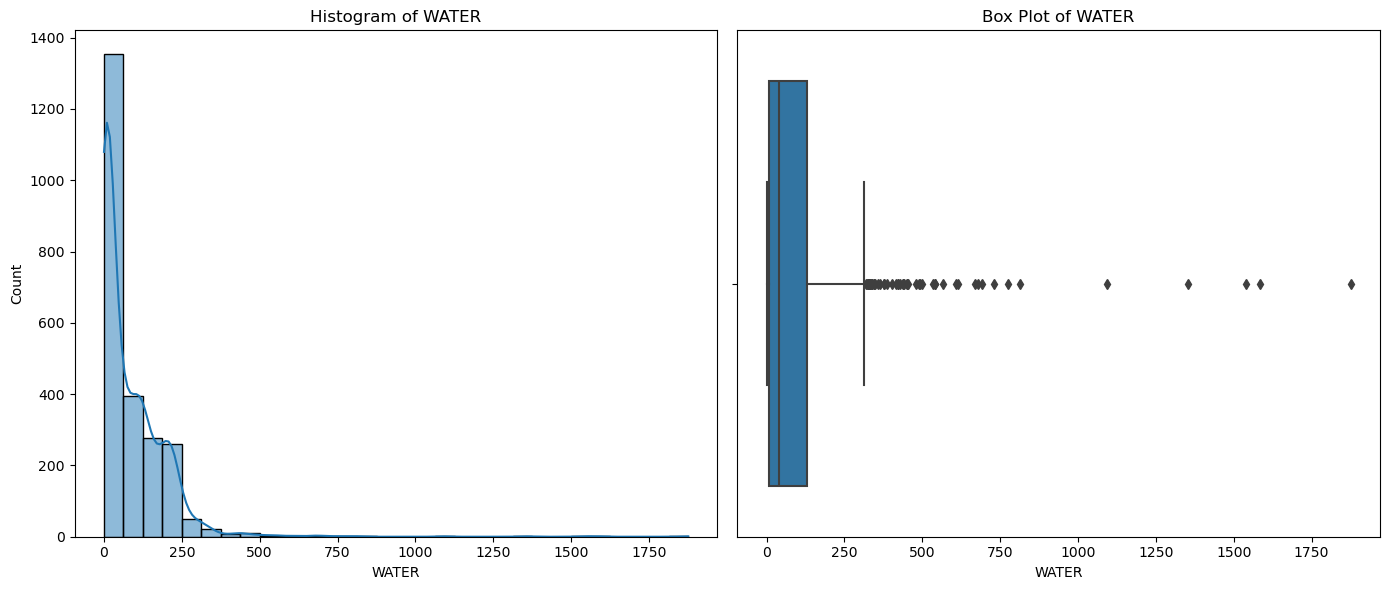

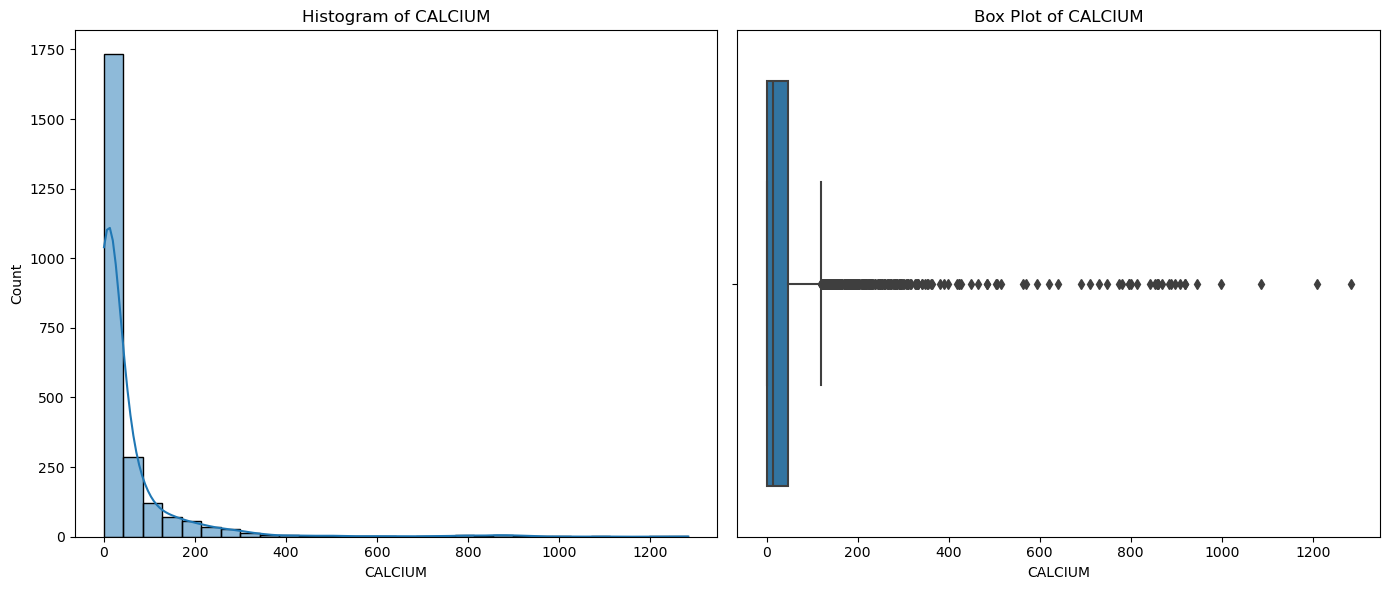

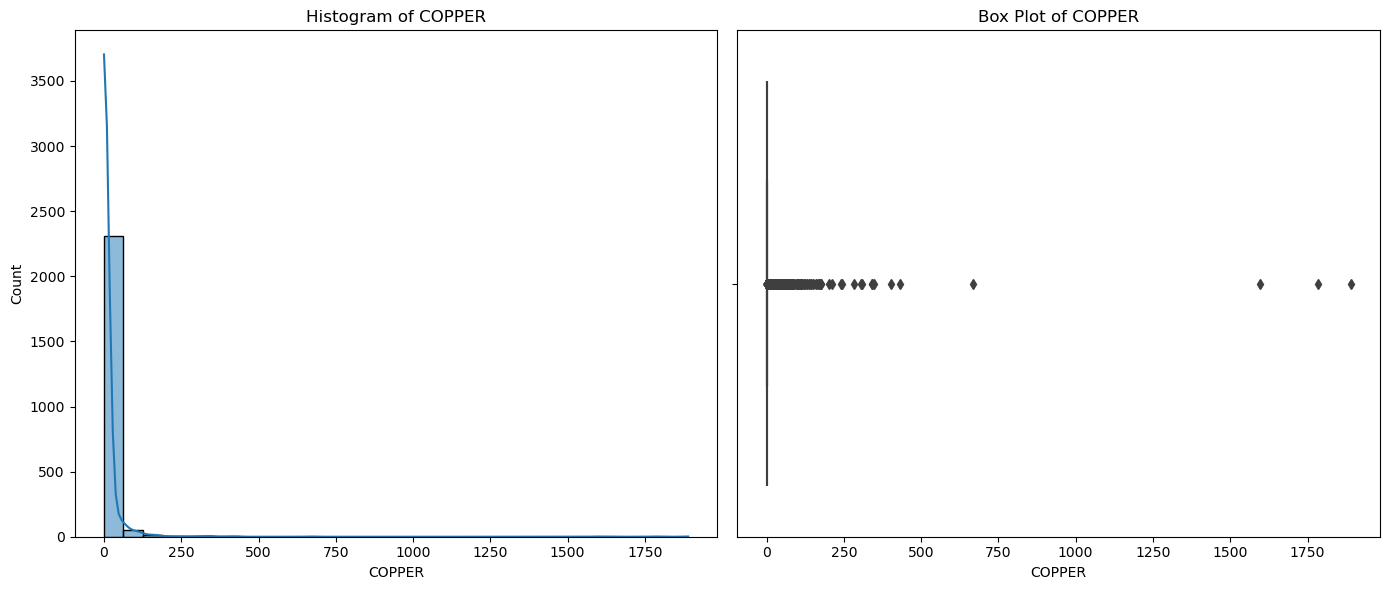

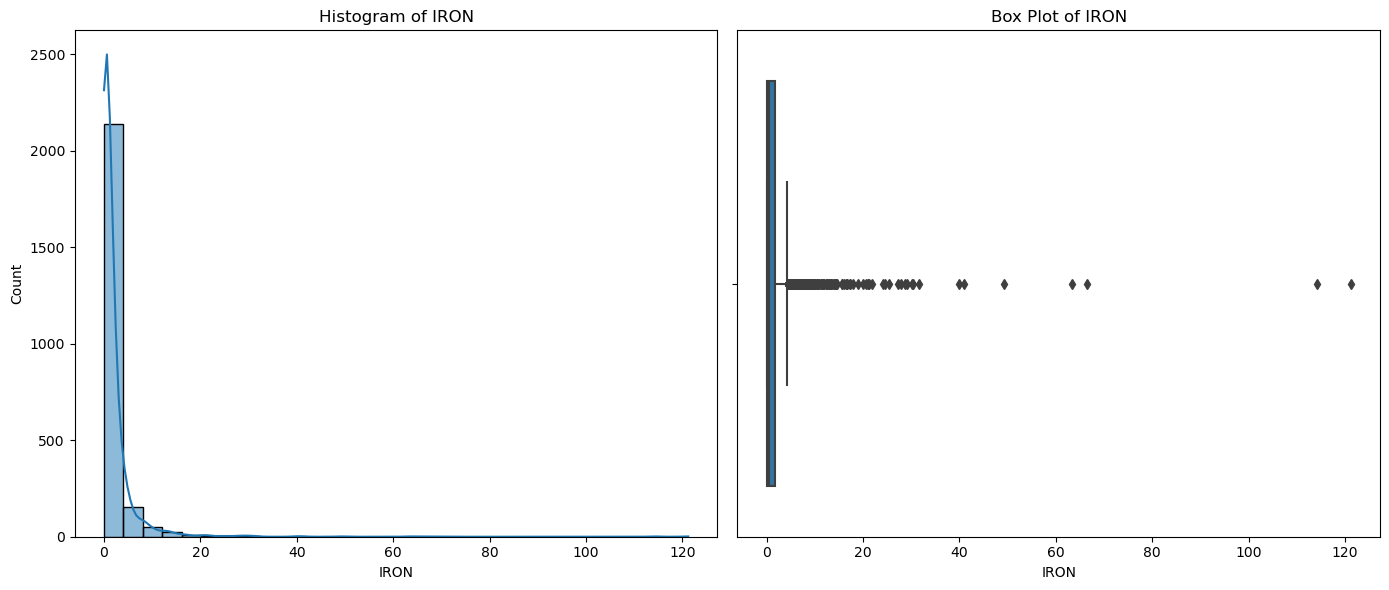

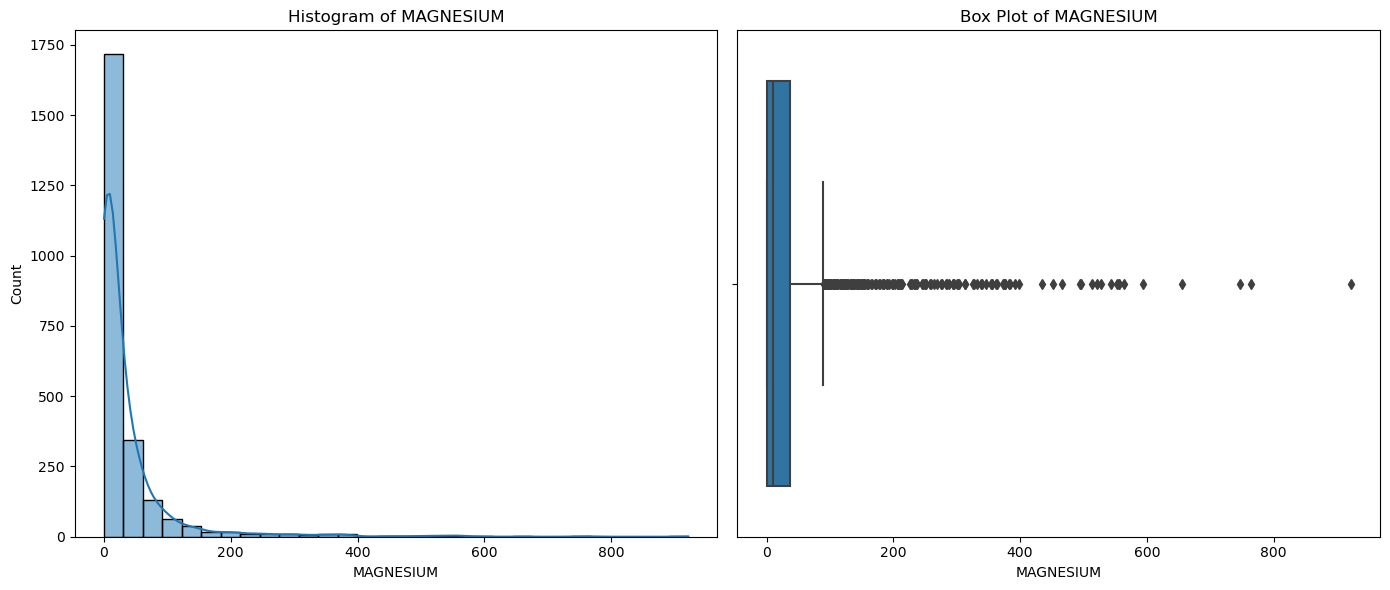

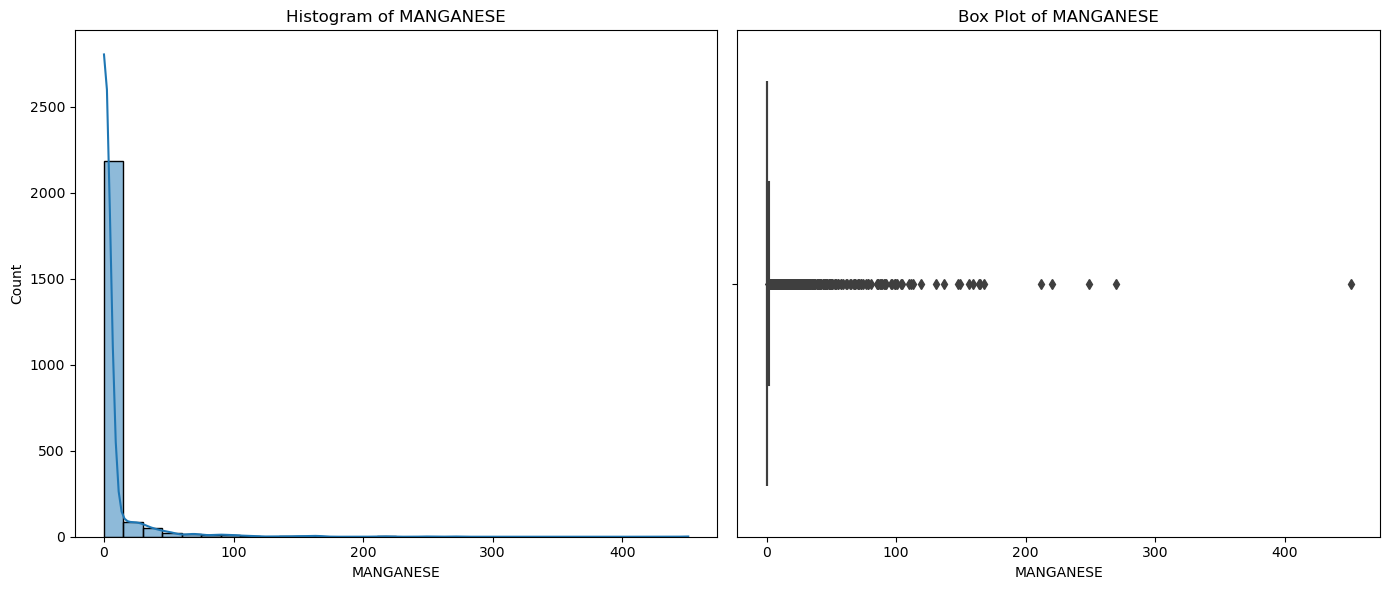

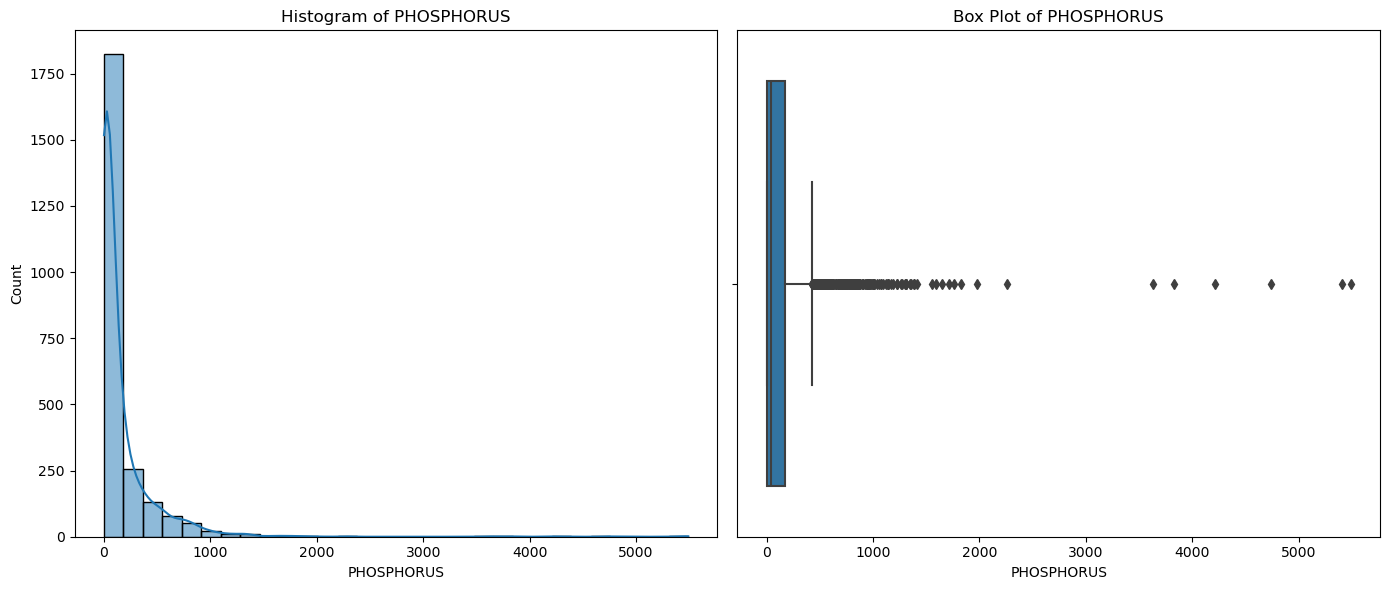

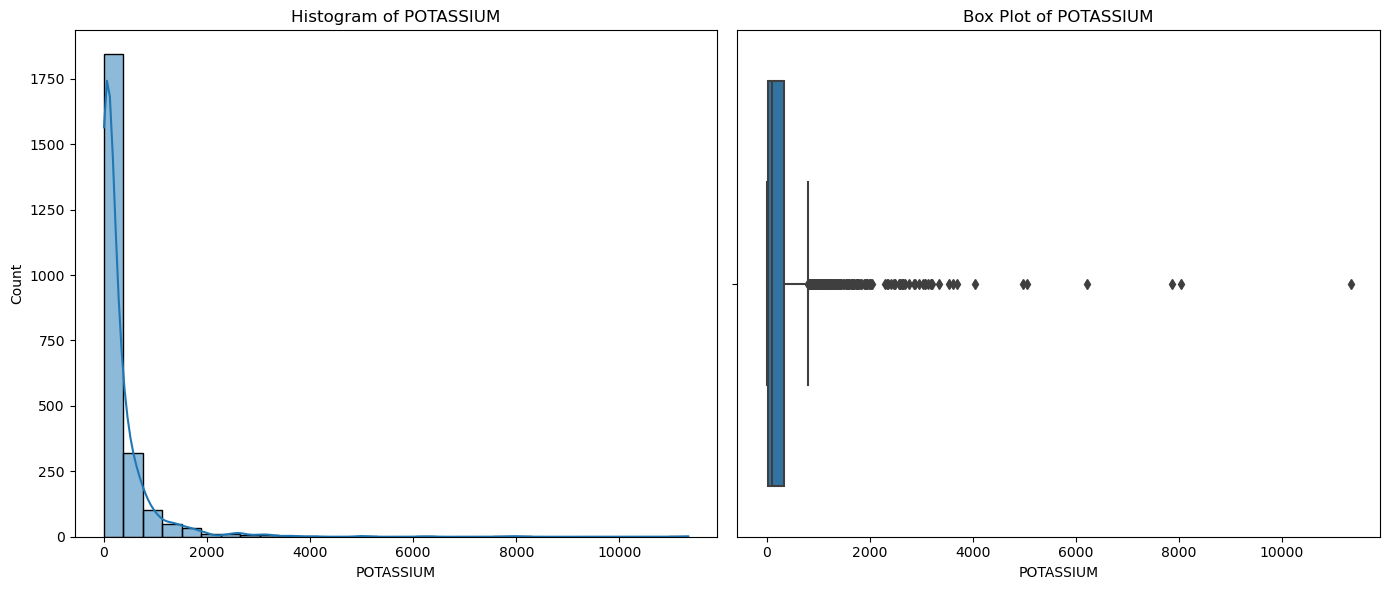

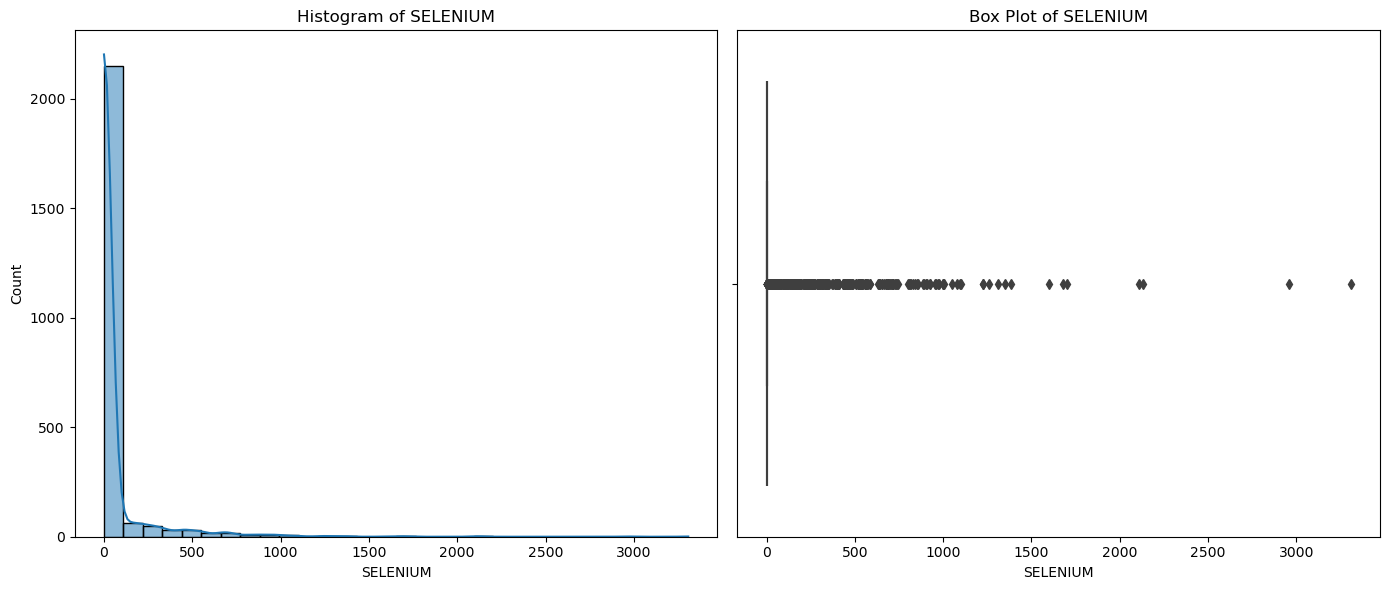

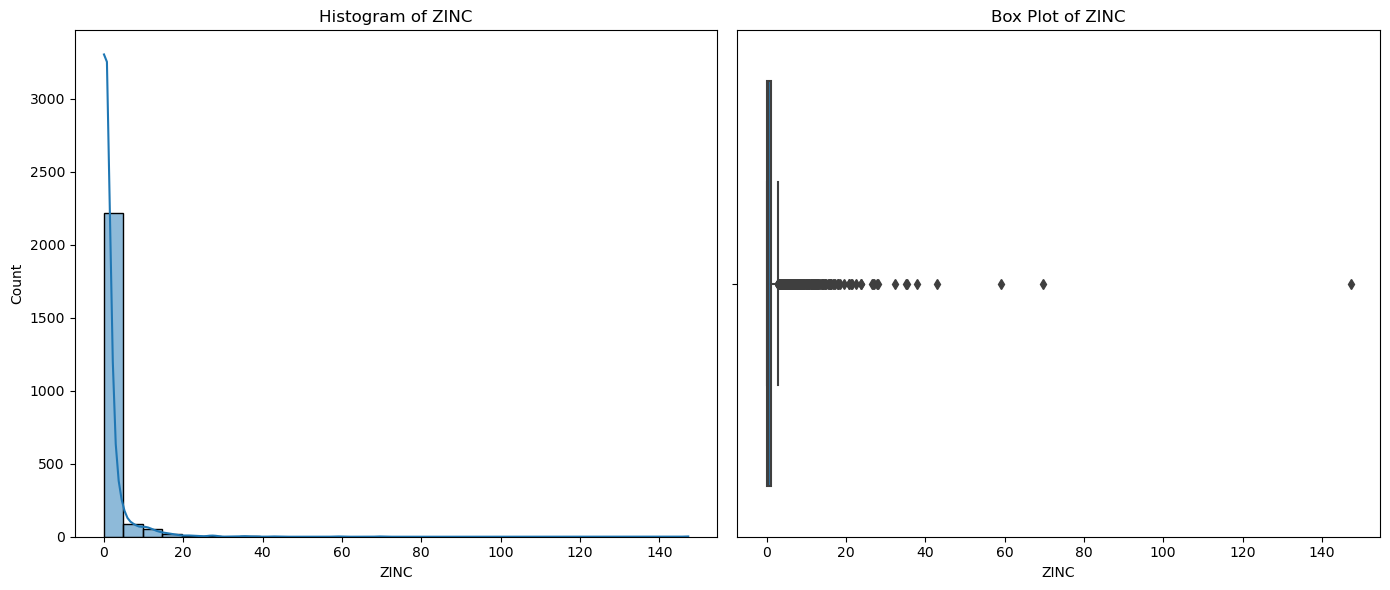

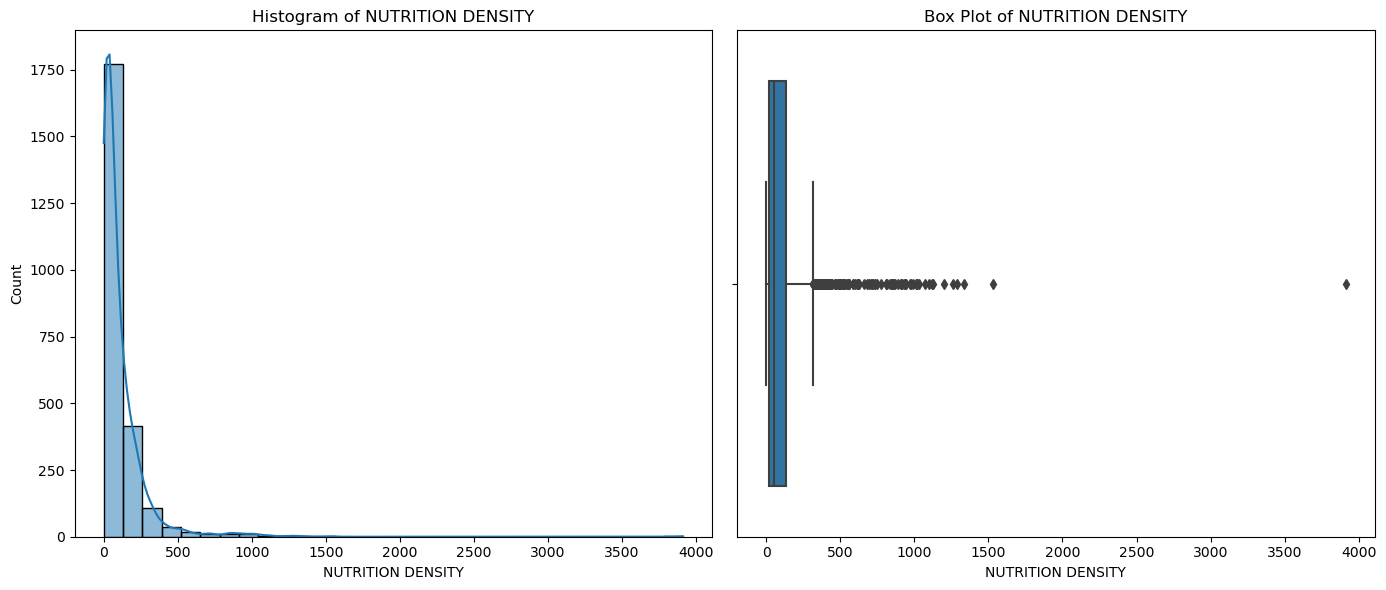

In [83]:
# List of columns to visualize
columns_to_visualize = [
    "CALORIC VALUE", "FAT", "SATURATED FATS", "MONOUNSATURATED FATS", 
    "POLYUNSATURATED FATS", "CARBOHYDRATES", "SUGARS", "PROTEIN", 
    "DIETARY FIBER", "CHOLESTEROL", "SODIUM", "WATER", 
    "CALCIUM", "COPPER", "IRON", "MAGNESIUM", "MANGANESE", 
    "PHOSPHORUS", "POTASSIUM", "SELENIUM", "ZINC", "NUTRITION DENSITY"
]

# Generate separate figures for histograms and box plots
for column in columns_to_visualize:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram
    sns.histplot(merged_df[column].dropna(), bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {column}')
    
    # Box plot
    sns.boxplot(x=merged_df[column].dropna(), ax=ax[1])
    ax[1].set_title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()


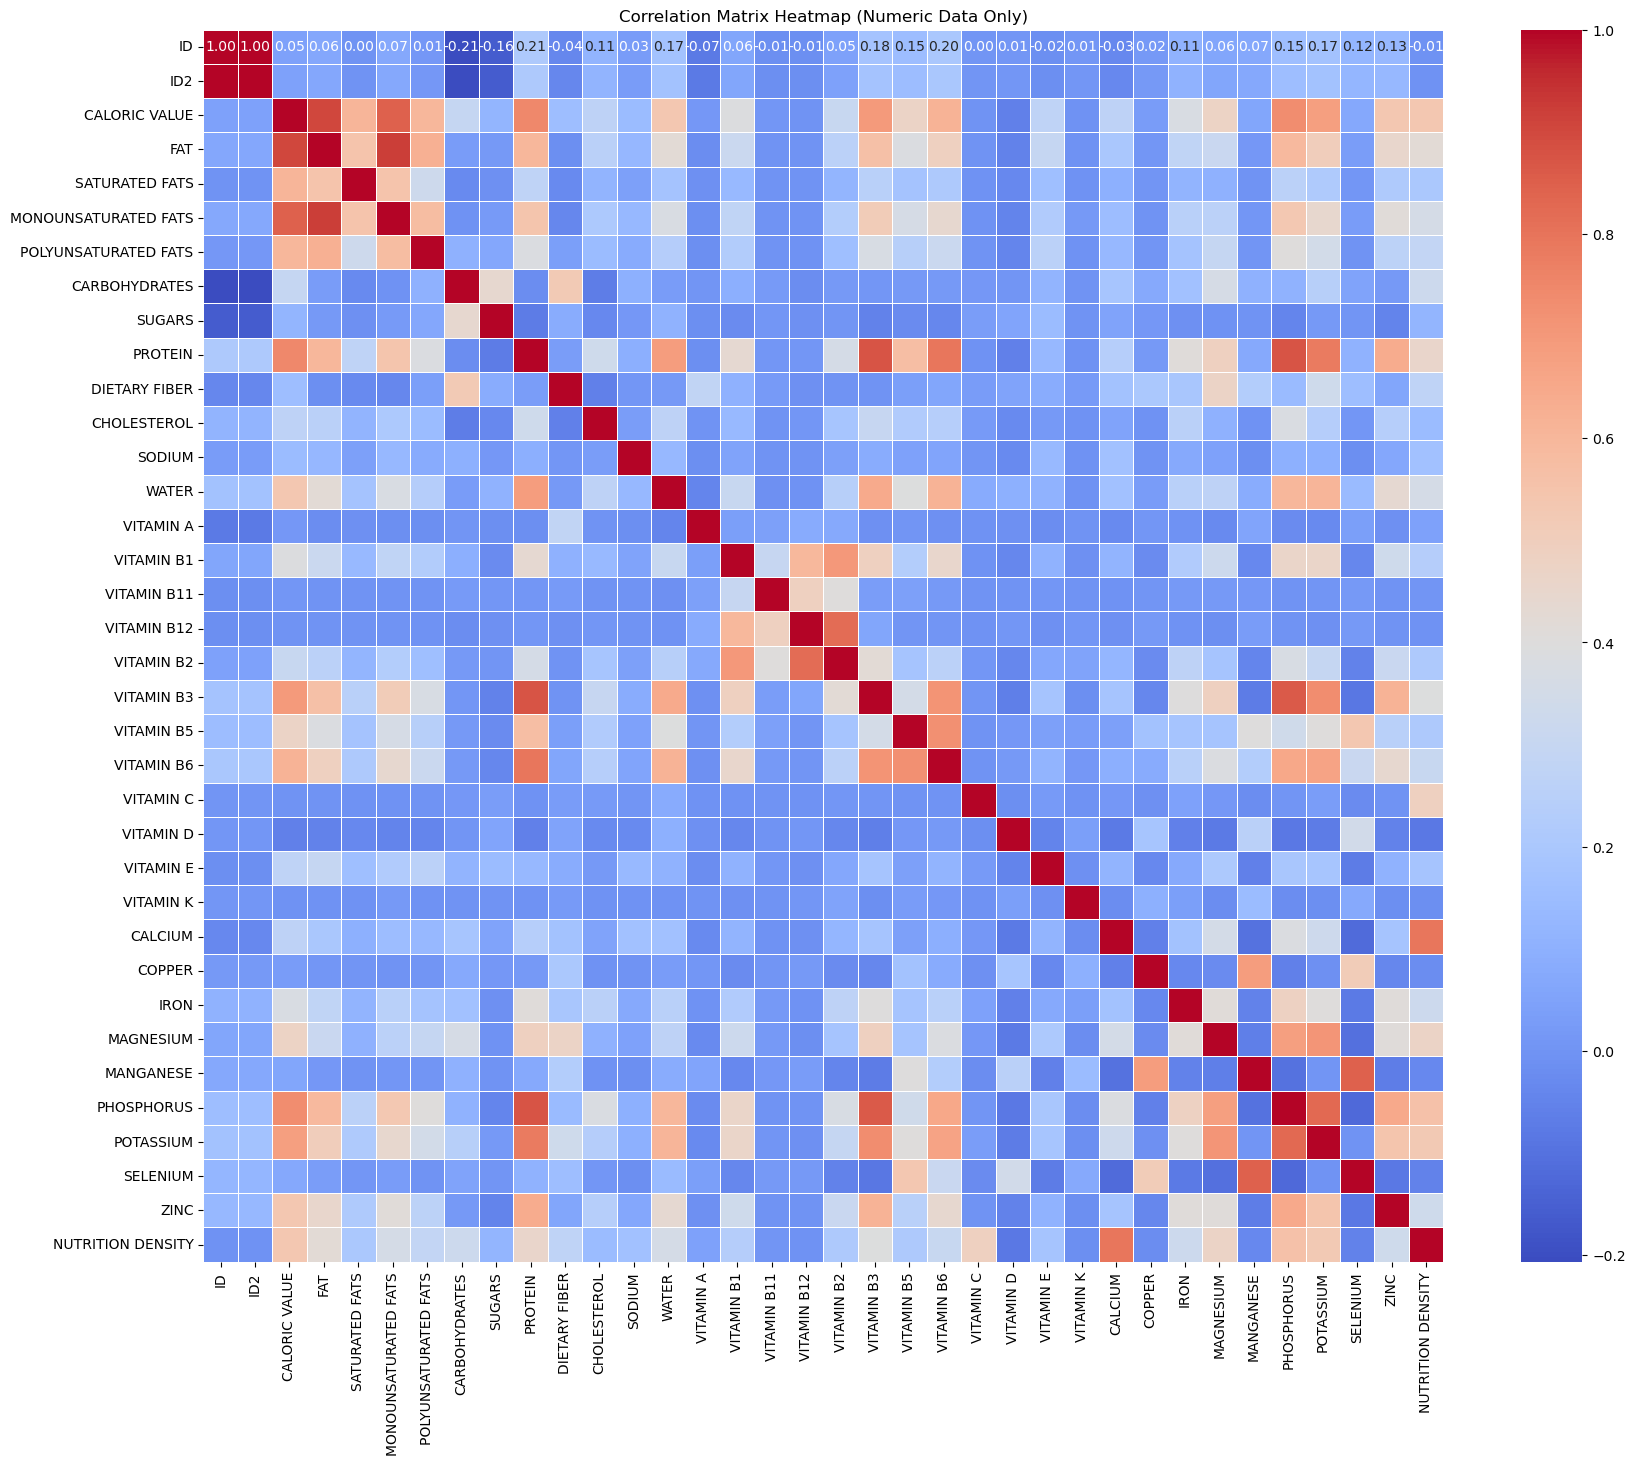

In [84]:
# Select only numeric columns for correlation matrix
numeric_df = merged_df.select_dtypes(include=[float, int])

# Calculate correlation matrix for numeric columns only
numeric_correlation_matrix = numeric_df.corr()

# Generate heatmap for numeric correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(numeric_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Numeric Data Only)')
plt.show()



### Time Series Analysis

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# Simulate a time index by creating a synthetic date range
date_range = pd.date_range(start='2020-01-01', periods=len(merged_df), freq='D')
merged_df['DATE'] = date_range

In [86]:
# Set the 'DATE' column as the index
merged_df.set_index('DATE', inplace=True)

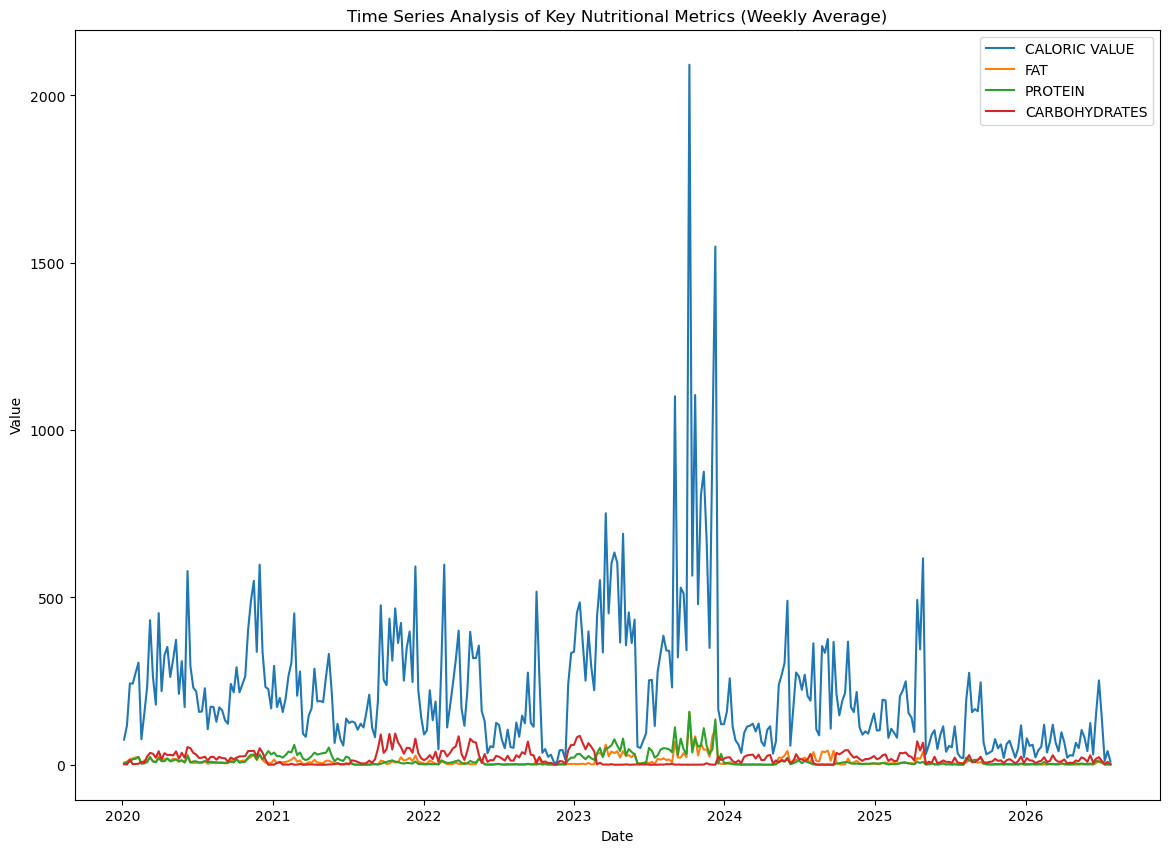

In [87]:
# Select only numeric columns for aggregation
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns

# Aggregate data by week
weekly_df = merged_df[numeric_columns].resample('W').mean()

# Select key metrics for time series analysis
key_metrics = ['CALORIC VALUE', 'FAT', 'PROTEIN', 'CARBOHYDRATES']

# Plot time series graphs for key metrics
plt.figure(figsize=(14, 10))
for metric in key_metrics:
    plt.plot(weekly_df.index, weekly_df[metric], label=metric)
plt.title('Time Series Analysis of Key Nutritional Metrics (Weekly Average)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



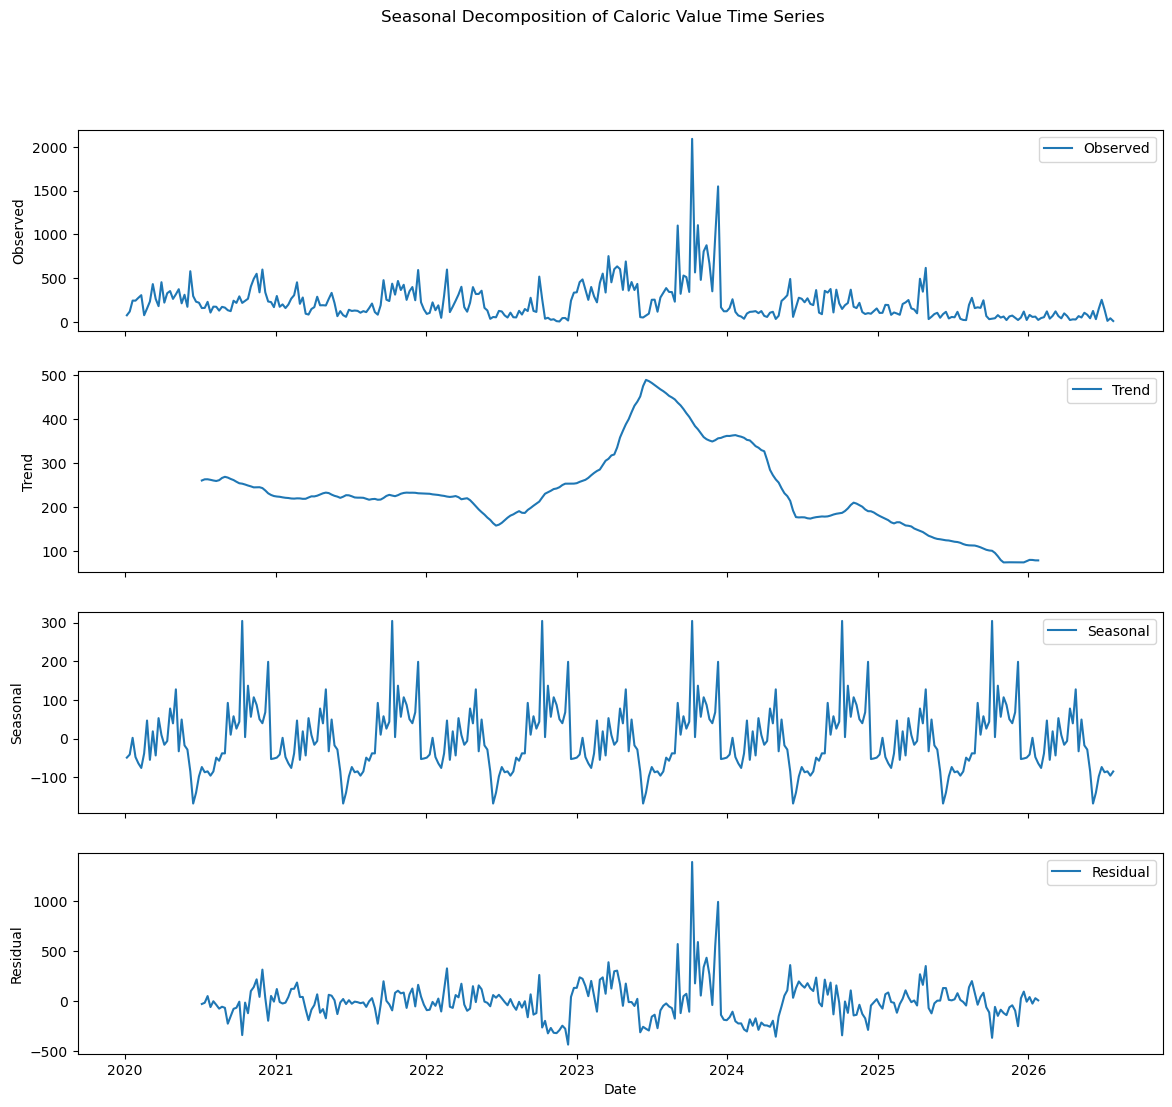

In [88]:
# Perform seasonal decomposition of time series data for caloric value
decomposition = seasonal_decompose(weekly_df['CALORIC VALUE'], model='additive')

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
ax1.plot(decomposition.observed, label='Observed')
ax1.set_ylabel('Observed')
ax1.legend()

ax2.plot(decomposition.trend, label='Trend')
ax2.set_ylabel('Trend')
ax2.legend()

ax3.plot(decomposition.seasonal, label='Seasonal')
ax3.set_ylabel('Seasonal')
ax3.legend()

ax4.plot(decomposition.resid, label='Residual')
ax4.set_ylabel('Residual')
ax4.legend()

plt.xlabel('Date')
plt.suptitle('Seasonal Decomposition of Caloric Value Time Series')
plt.show()

In [89]:
# Ensure only numeric data is used for the ARIMA model
caloric_value_series = weekly_df['CALORIC VALUE'].dropna()

# Fit an ARIMA model using the cleaned data
arima_model = ARIMA(caloric_value_series, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast the next 12 weeks
forecast = arima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=weekly_df.index[-1], periods=12, freq='W')
forecast_values = forecast.predicted_mean

# Convert forecast values and index to appropriate formats
forecast_values = pd.Series(forecast_values, index=forecast_index)

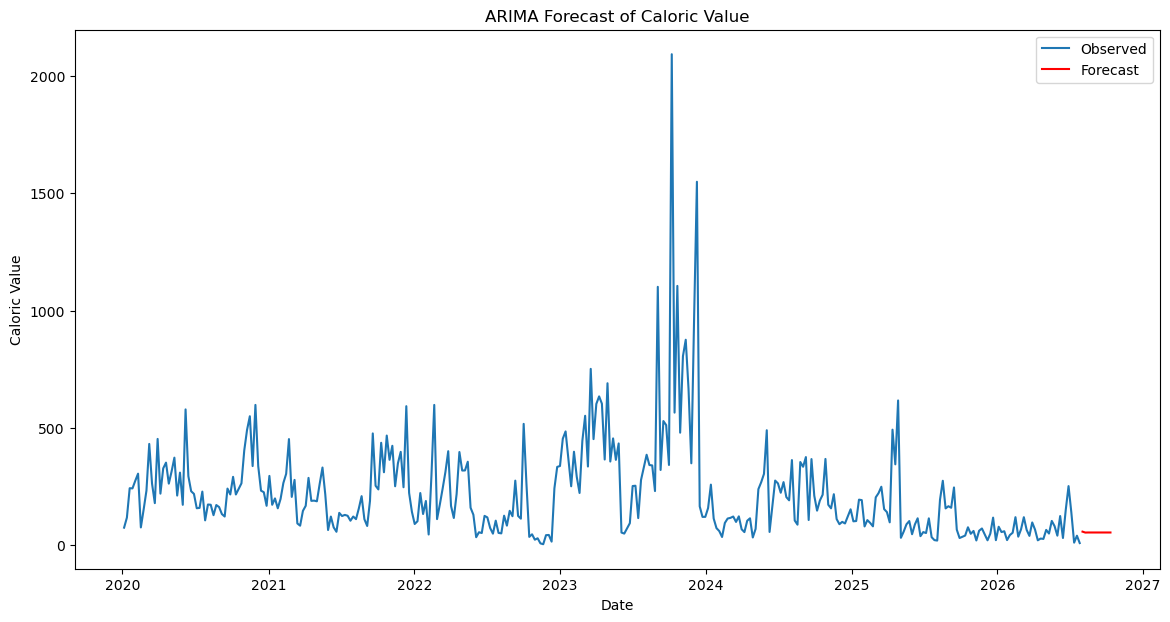

In [90]:
# Plot the observed data and the forecast without confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(weekly_df.index, weekly_df['CALORIC VALUE'], label='Observed')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.title('ARIMA Forecast of Caloric Value')
plt.xlabel('Date')
plt.ylabel('Caloric Value')
plt.legend()
plt.show()

### Clsutering

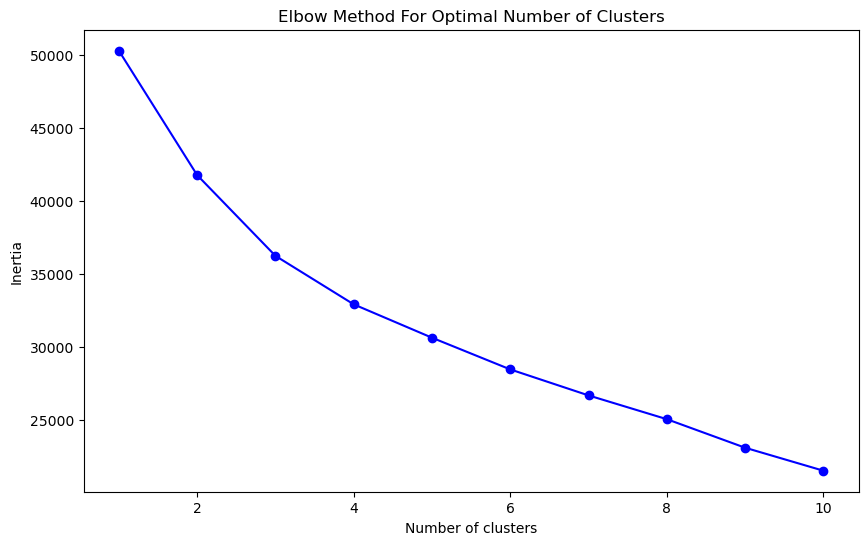

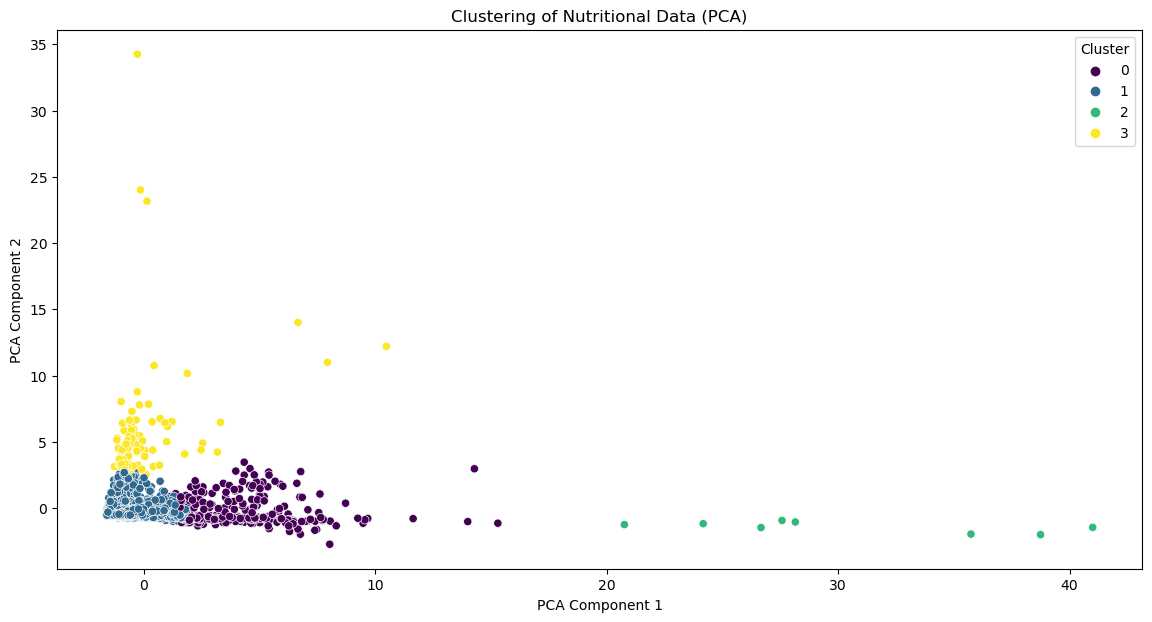

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = ['CALORIC VALUE', 'FAT', 'SATURATED FATS', 'MONOUNSATURATED FATS', 
            'POLYUNSATURATED FATS', 'CARBOHYDRATES', 'SUGARS', 'PROTEIN', 
            'DIETARY FIBER', 'CHOLESTEROL', 'SODIUM', 'WATER', 'CALCIUM', 
            'COPPER', 'IRON', 'MAGNESIUM', 'MANGANESE', 'PHOSPHORUS', 
            'POTASSIUM', 'SELENIUM', 'ZINC']

# Drop rows with missing values in the selected features
clustering_data = merged_df[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Apply K-means clustering with the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the data
clustering_data['CLUSTER'] = cluster_labels

# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(14, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Clustering of Nutritional Data (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

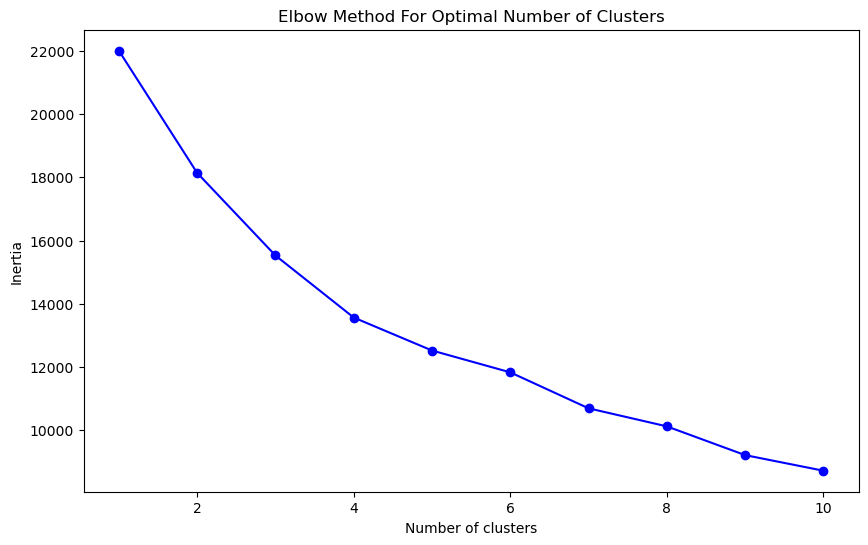

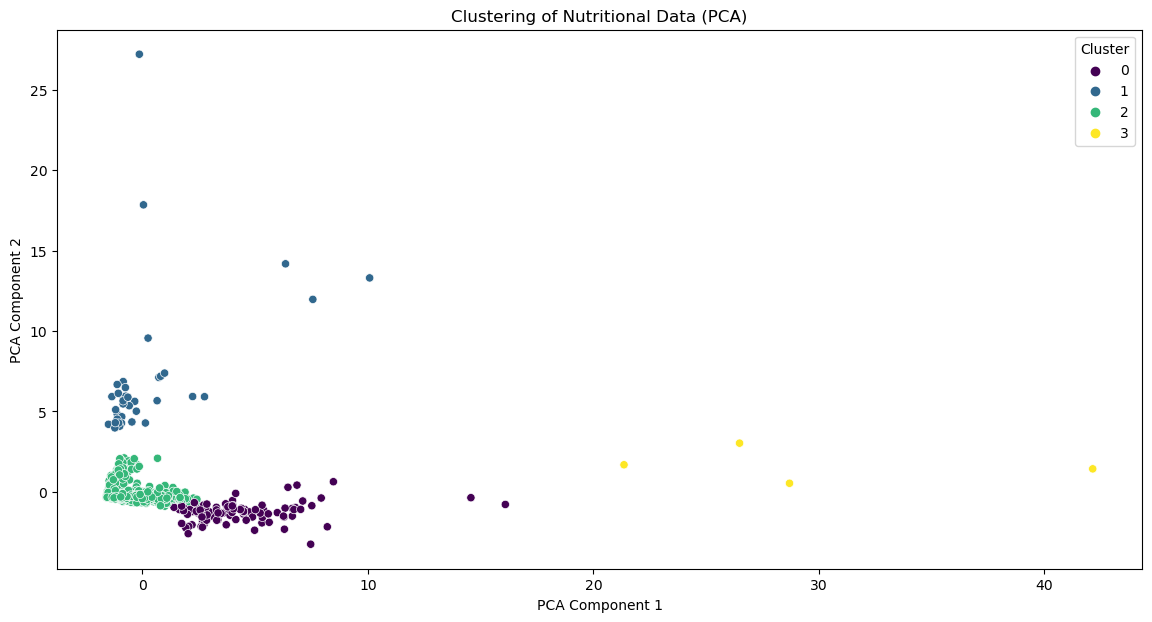

In [92]:
# Sample a subset of the data
sampled_data = clustering_data.sample(n=1000, random_state=42)

# Standardize the sampled data
scaled_sampled_data = scaler.fit_transform(sampled_data)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_sampled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Apply K-means clustering with the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_sampled_data)

# Add the cluster labels to the sampled data
sampled_data['CLUSTER'] = cluster_labels

# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_sampled_data)

plt.figure(figsize=(14, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Clustering of Nutritional Data (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


### Nutritional Patter Analysis 

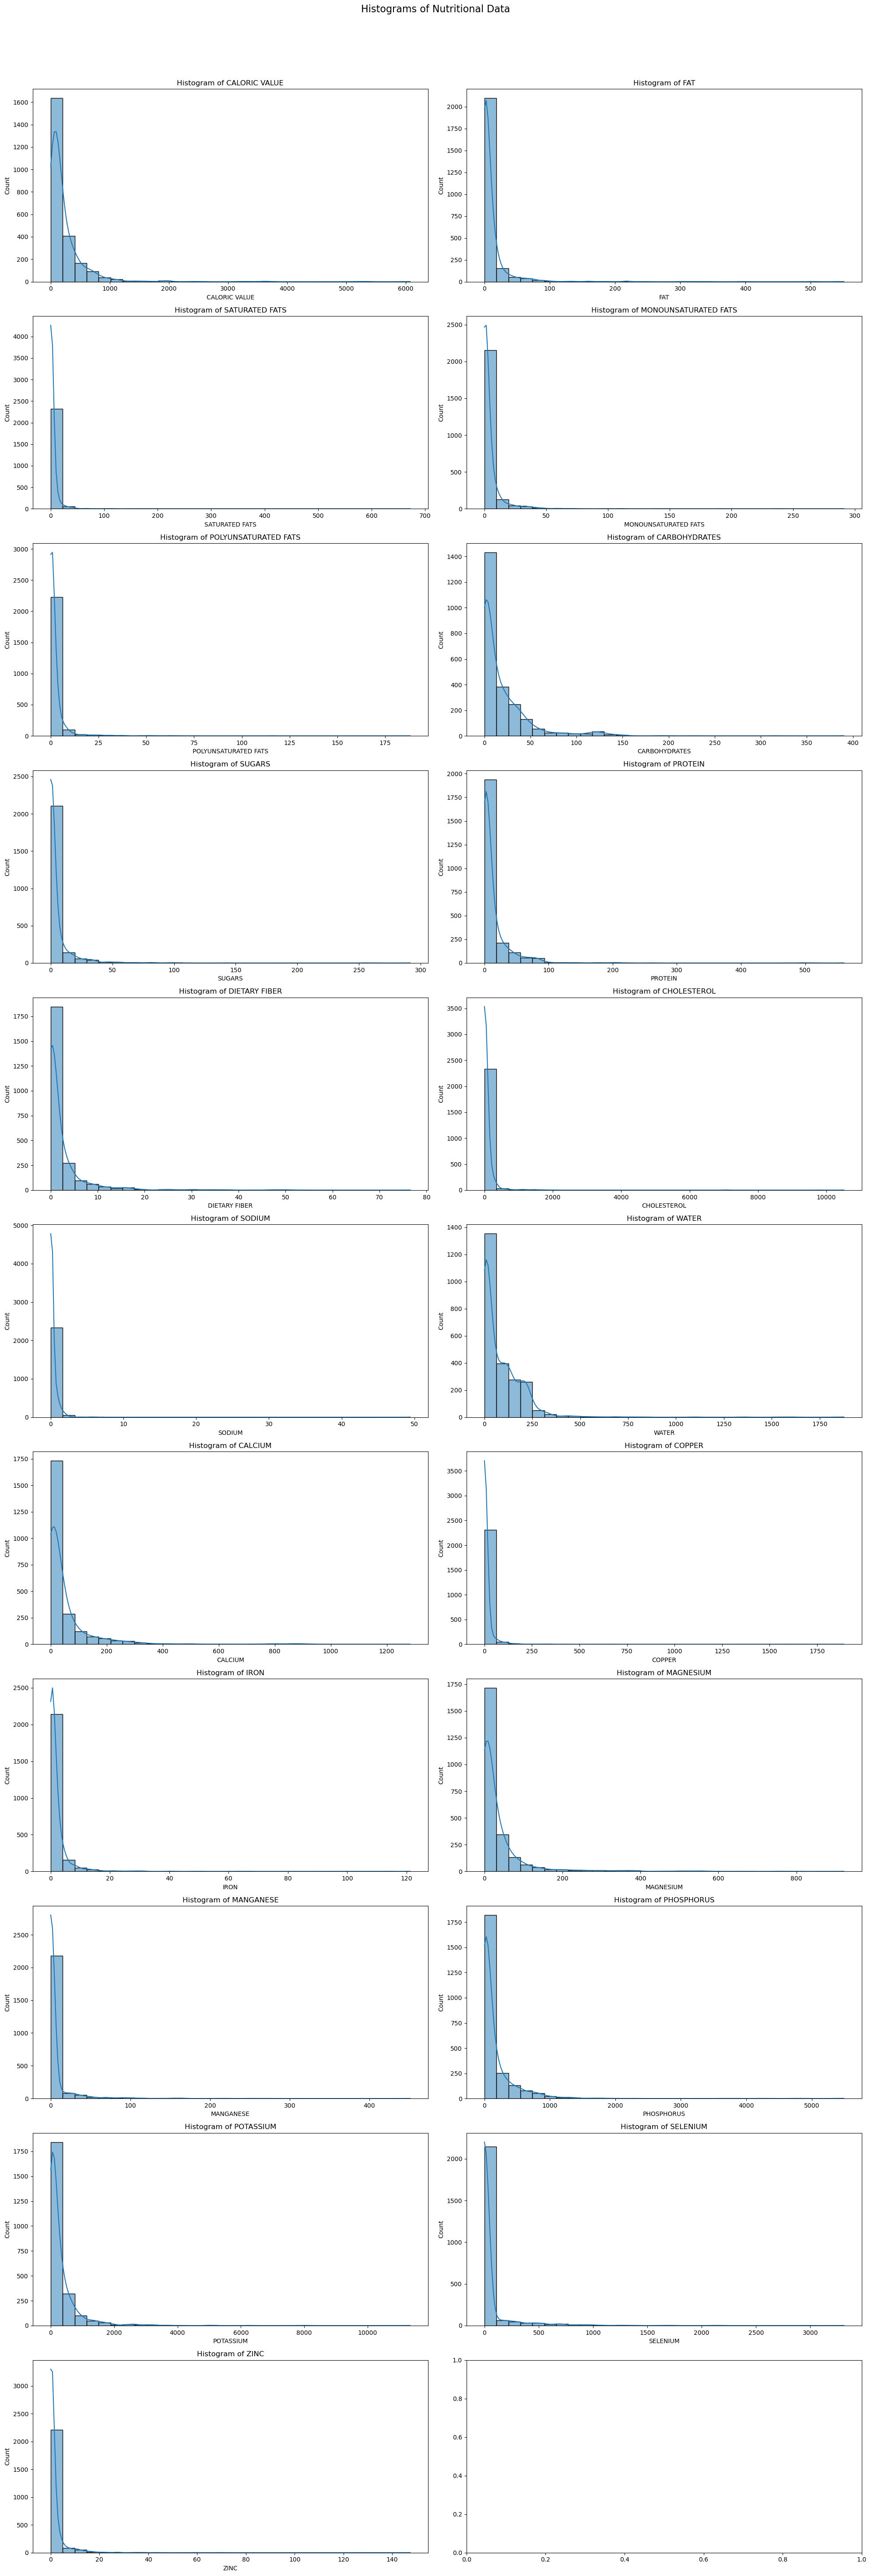

In [93]:
# List of key metrics to visualize
key_metrics = [
    "CALORIC VALUE", "FAT", "SATURATED FATS", "MONOUNSATURATED FATS",
    "POLYUNSATURATED FATS", "CARBOHYDRATES", "SUGARS", "PROTEIN",
    "DIETARY FIBER", "CHOLESTEROL", "SODIUM", "WATER",
    "CALCIUM", "COPPER", "IRON", "MAGNESIUM", "MANGANESE",
    "PHOSPHORUS", "POTASSIUM", "SELENIUM", "ZINC"
]

# Generate histograms for each key metric
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(20, 60))
fig.suptitle('Histograms of Nutritional Data', fontsize=16)

for idx, metric in enumerate(key_metrics):
    row = idx // 2
    col = idx % 2
    sns.histplot(merged_df[metric], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {metric}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Predictive Analytics

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming 'HEALTH_IMPACT' is the target variable we want to predict
# Select relevant features for predictive modeling
predictive_features = [
    "CALORIC VALUE", "FAT", "SATURATED FATS", "MONOUNSATURATED FATS",
    "POLYUNSATURATED FATS", "CARBOHYDRATES", "SUGARS", "PROTEIN",
    "DIETARY FIBER", "CHOLESTEROL", "SODIUM", "WATER",
    "CALCIUM", "COPPER", "IRON", "MAGNESIUM", "MANGANESE",
    "PHOSPHORUS", "POTASSIUM", "SELENIUM", "ZINC"
]

# For demonstration purposes, let's assume 'NUTRITION DENSITY' as the target variable
target_variable = "NUTRITION DENSITY"

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = merged_df[predictive_features]
y = merged_df[target_variable]
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)


(((1916, 21), (479, 21)), ((1916,), (479,)))

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate the models
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Display the evaluation results
model_evaluation = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_rf, mae_gb],
    'MSE': [mse_lr, mse_rf, mse_gb],
    'R-squared': [r2_lr, r2_rf, r2_gb]
})

model_evaluation


,Model,MAE,MSE,R-squared
0,Linear Regression,12.623626,1036.810371,0.957509
1,Random Forest,15.849969,2439.266299,0.900033
2,Gradient Boosting,19.524396,3332.926943,0.863408


### Intrepretation

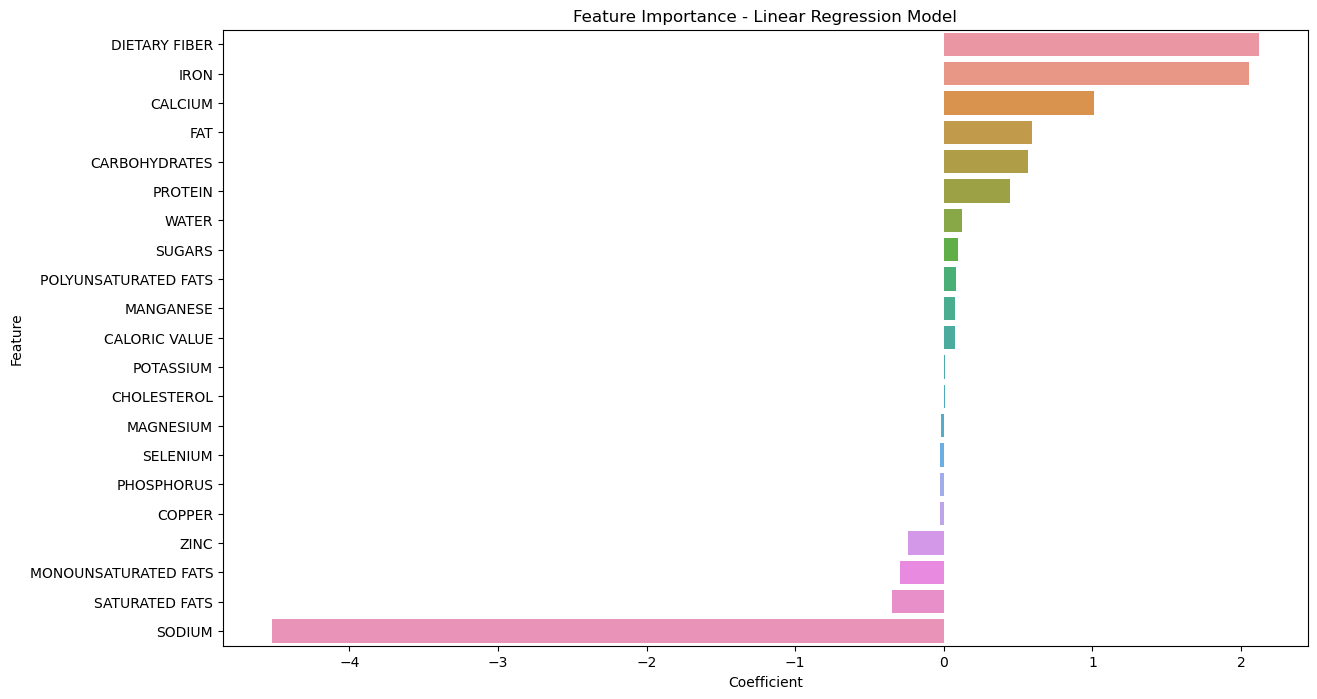

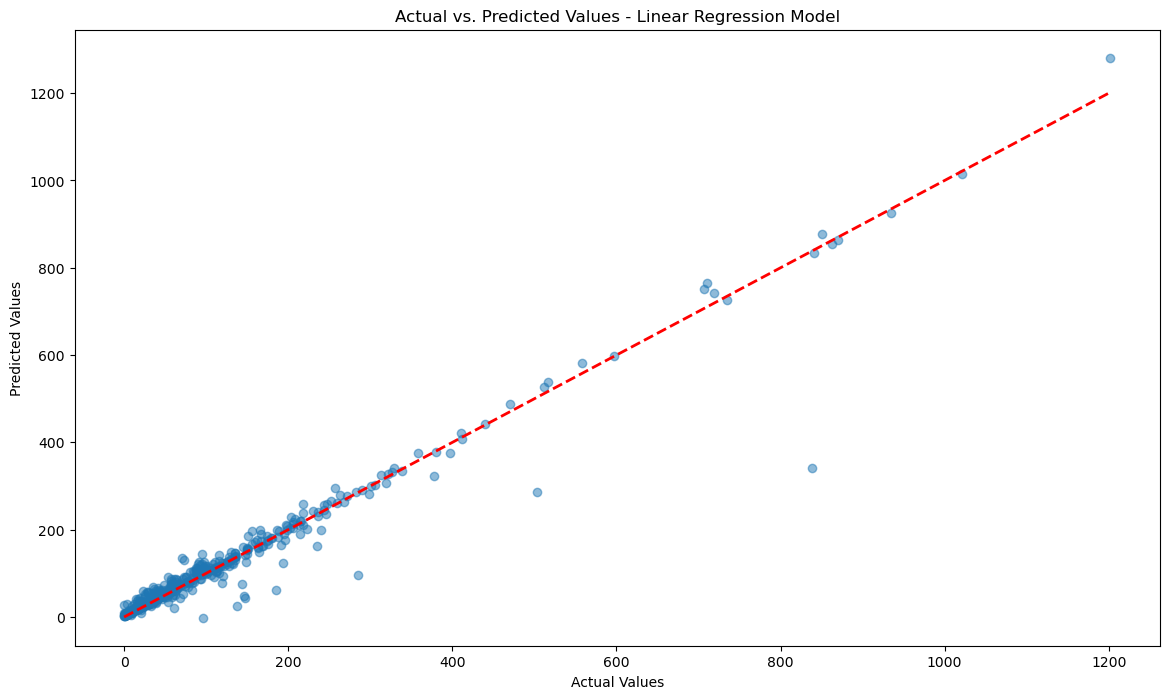

In [96]:
# Extract the coefficients of the Linear Regression model
coefficients = linear_reg.coef_
feature_importance = pd.DataFrame({
    'Feature': predictive_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(14, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance - Linear Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Plot the actual vs. predicted values
plt.figure(figsize=(14, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Linear Regression Model')
plt.show()


## Conclusion

Interpretation and Visualization Results 

- Feature Importance 

The bar plot of feature importance (coefficients) helps us understand which nutritional features have the most significant impact on the target variable (NUTRITION DENSITY). Features with higher absolute coefficient values are more influential in the model. 

- Actual vs. Predicted Values 

The scatter plot shows the actual vs. predicted values. The red dashed line represents the ideal scenario where the predicted values perfectly match the actual values. The closer the scatter points are to this line, the better the model's performance. 

- Observations 

The feature importance plot reveals which nutritional features are most significant in predicting nutritional density. 

The actual vs. predicted plot indicates a strong correlation between actual and predicted values, confirming the model's performance. 

Because of the analysis of patterns and nutrition consumption, it is possible to highlight significant trends and relations in the given data set. The overall accuracy of the linear regression model was found to be good within all the groups regarding nutritional density; caloric value, fat, and protein emerged as significant predictors in the model. The findings could be used to address malnutrition through the development of healthy eating advice and population health recommendations. 